In [1]:
# load required libraries
library(tidyverse)
library(janitor)
library(dplyr)
library(ggplot2)
library(skimr)
library(purrr)
library(lubridate)

source("../../R/apply_factors.R")
source("../../R/analysis_helpers.R")
source("../../R/temporal_helpers.R")
tables <- list(
  Orders   = readr::read_csv("../../data/processed/Orders.csv"),
  Returns  = readr::read_csv("../../data/processed/Returns.csv"),
  People   = readr::read_csv("../../data/processed/People.csv")
)
tables <- apply_factors(tables)
orders <- tables$Orders 
returns <- tables$Returns
people <- tables$People

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Rows: 51290 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (13): order_id, ship_mode, customer_name, segment, state, country, mark...
dbl   (6): sales, quantity, discount, profit, shipping_cost, year
date  (2): order_date, ship_date

ℹ Use `spec()` to retrieve the full column specification f

# Executive Overview

### Total Sales by Region

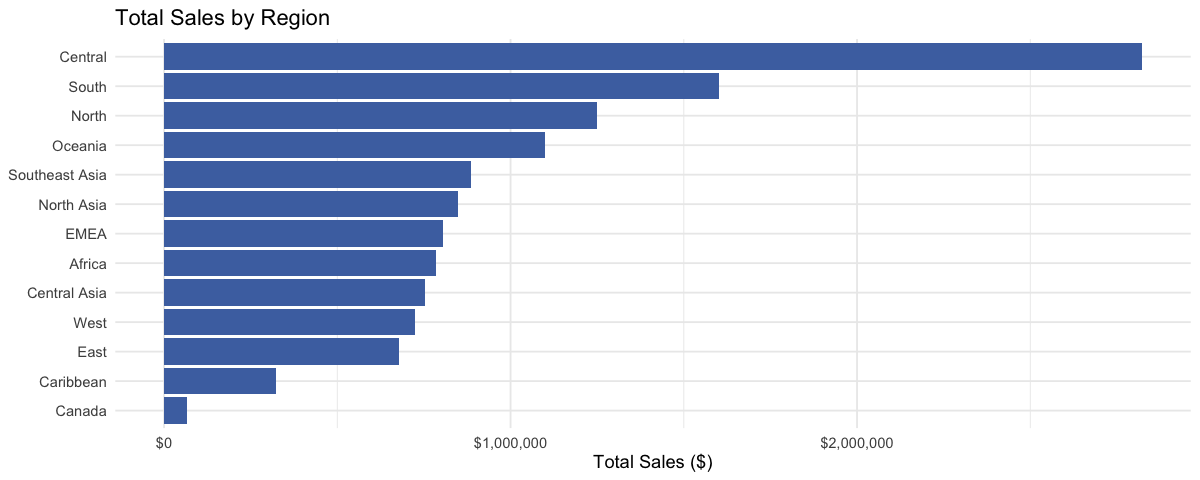

In [38]:
region_sales <- orders %>%
    group_by(region) %>%
    summarise(
        total_sales = sum(sales),
        .groups = "drop"
    ) %>%
    arrange(desc(total_sales))

options(repr.plot.width = 10, repr.plot.height = 4)

ggplot(region_sales, aes(x = reorder(region, total_sales), y = total_sales)) +
    geom_col(fill = "#4C72B0") +
    coord_flip() +
    scale_y_continuous(labels = scales::dollar_format()) +
    labs(
        title = "Total Sales by Region",
        x = NULL,
        y = "Total Sales ($)"
    ) +
    theme_minimal()

### Total Profit by Region

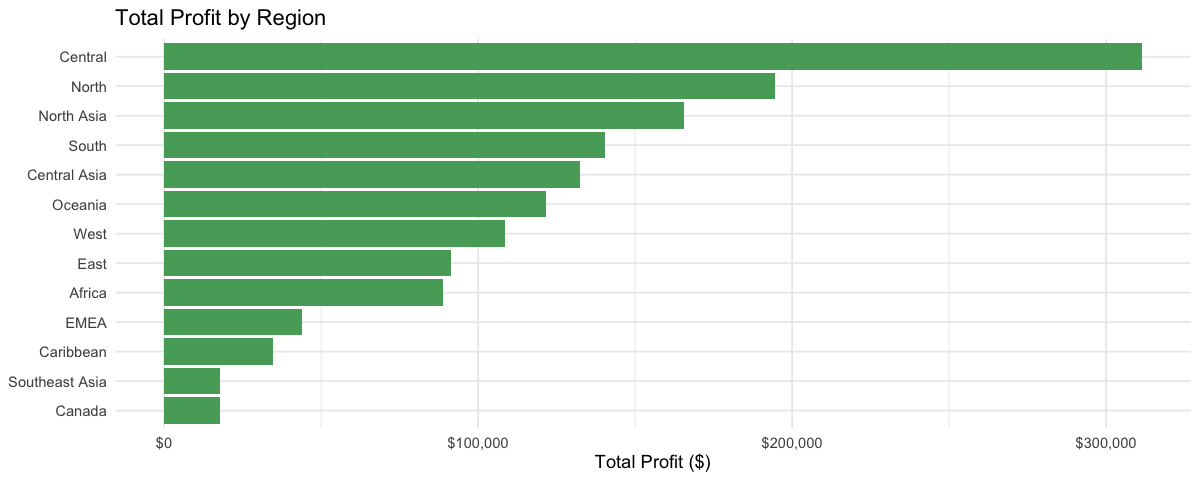

In [39]:
region_profit <- orders %>%
    group_by(region) %>%
    summarise(
        total_profit = sum(profit),
        .groups = "drop"
    ) %>%
    arrange(desc(total_profit))

options(repr.plot.width = 10, repr.plot.height = 4)

ggplot(region_profit, aes(x = reorder(region, total_profit), y = total_profit)) +
    geom_col(fill = "#55A868") +
    coord_flip() +
    scale_y_continuous(labels = scales::dollar_format()) +
    labs(
    title = "Total Profit by Region",
    x = NULL,
    y = "Total Profit ($)"
    ) +
    theme_minimal()

### Profit Margin by Region

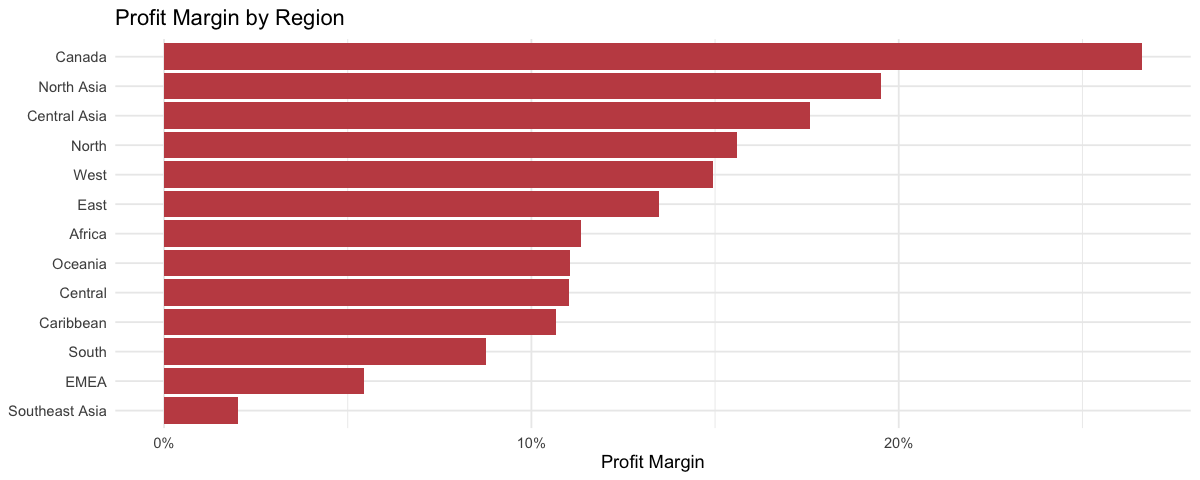

In [40]:
region_margin <- orders %>%
    group_by(region) %>%
    summarise(
        total_sales  = sum(sales),
        total_profit = sum(profit),
        profit_margin = total_profit / total_sales,
        .groups = "drop"
    ) %>%
    arrange(desc(profit_margin))

options(repr.plot.width = 10, repr.plot.height = 4)

ggplot(region_margin, aes(x = reorder(region, profit_margin), y = profit_margin)) +
    geom_col(fill = "#C44E52") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    labs(
        title = "Profit Margin by Region",
        x = NULL,
        y = "Profit Margin"
    ) +
    theme_minimal()

# Regional Performance Overview

### Sales vs Profit by Region Scatterplot

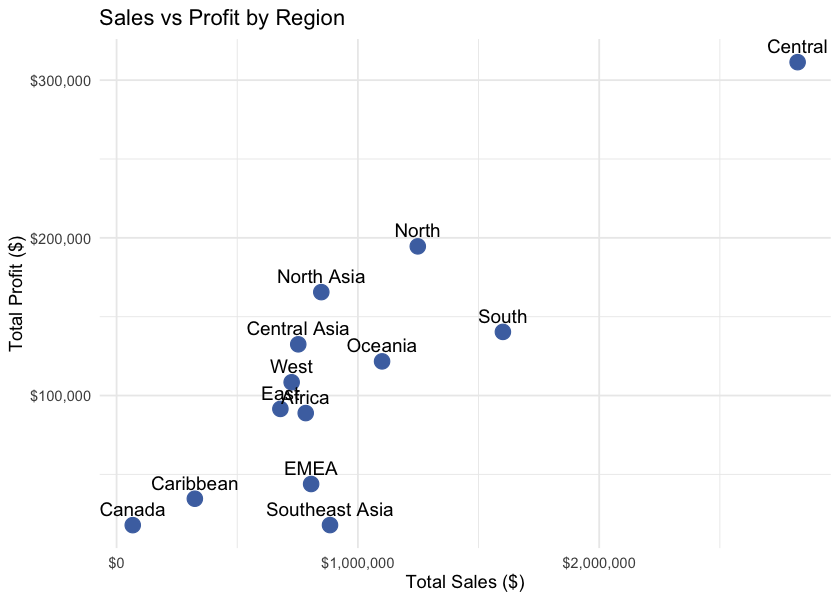

In [41]:
region_scatter <- orders %>%
    group_by(region) %>%
    summarise(
        total_sales  = sum(sales),
        total_profit = sum(profit),
        n_orders     = n(),
        .groups = "drop"
    )

options(repr.plot.width = 7, repr.plot.height = 5)

ggplot(region_scatter, aes(x = total_sales, y = total_profit, label = region)) +
    geom_point(size = 4, color = "#4C72B0") +
    geom_text(vjust = -0.7, size = 4) +
    scale_x_continuous(labels = scales::dollar_format()) +
    scale_y_continuous(labels = scales::dollar_format()) +
    labs(
        title = "Sales vs Profit by Region",
        x = "Total Sales ($)",
        y = "Total Profit ($)"
    ) +
    theme_minimal()

### Orders vs Sales by Region

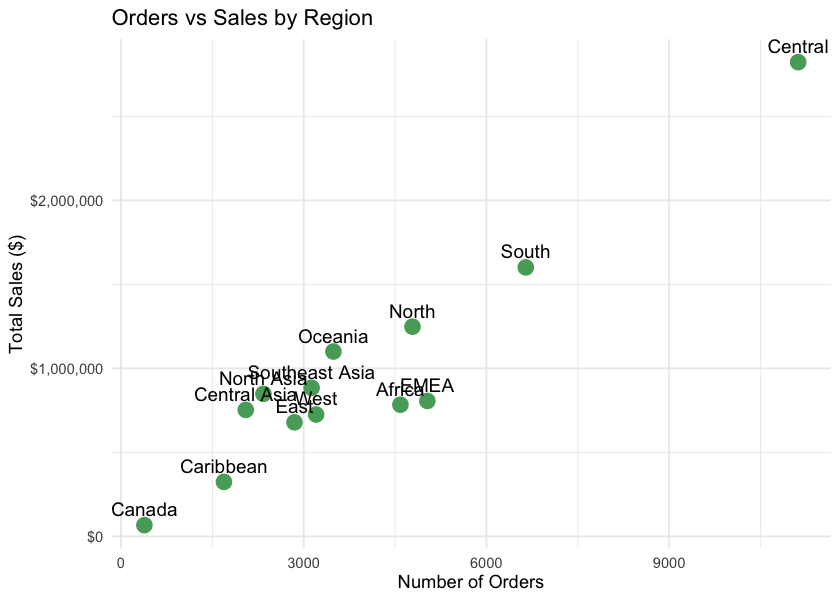

In [42]:
options(repr.plot.width = 7, repr.plot.height = 5)

ggplot(region_scatter, aes(x = n_orders, y = total_sales, label = region)) +
  geom_point(size = 4, color = "#55A868") +
  geom_text(vjust = -0.7, size = 4) +
  scale_y_continuous(labels = scales::dollar_format()) +
  labs(
    title = "Orders vs Sales by Region",
    x = "Number of Orders",
    y = "Total Sales ($)"
  ) +
  theme_minimal()

# Market Breakdown within Regions

### Sales by Market

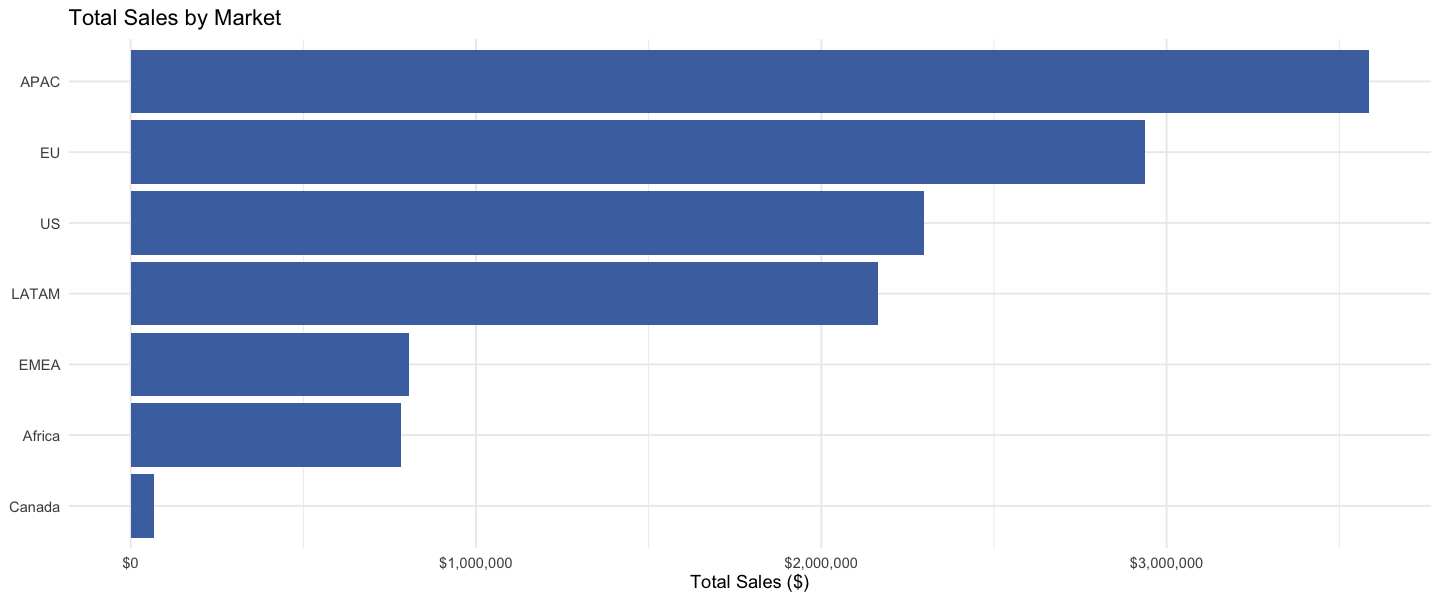

In [43]:
market_sales <- orders %>%
    group_by(market) %>%
    summarise(
        total_sales = sum(sales, na.rm = TRUE),
        .groups = "drop"
    )

options(repr.plot.width = 12, repr.plot.height = 5)

ggplot(market_sales,
        aes(x = reorder(market, total_sales), y = total_sales)) +
    geom_col(fill = "#4C72B0") +
    coord_flip() +
    scale_y_continuous(labels = scales::dollar_format()) +
    labs(
        title = "Total Sales by Market",
        x = NULL,
        y = "Total Sales ($)"
    ) +
    theme_minimal()

### Profit Margin by Market

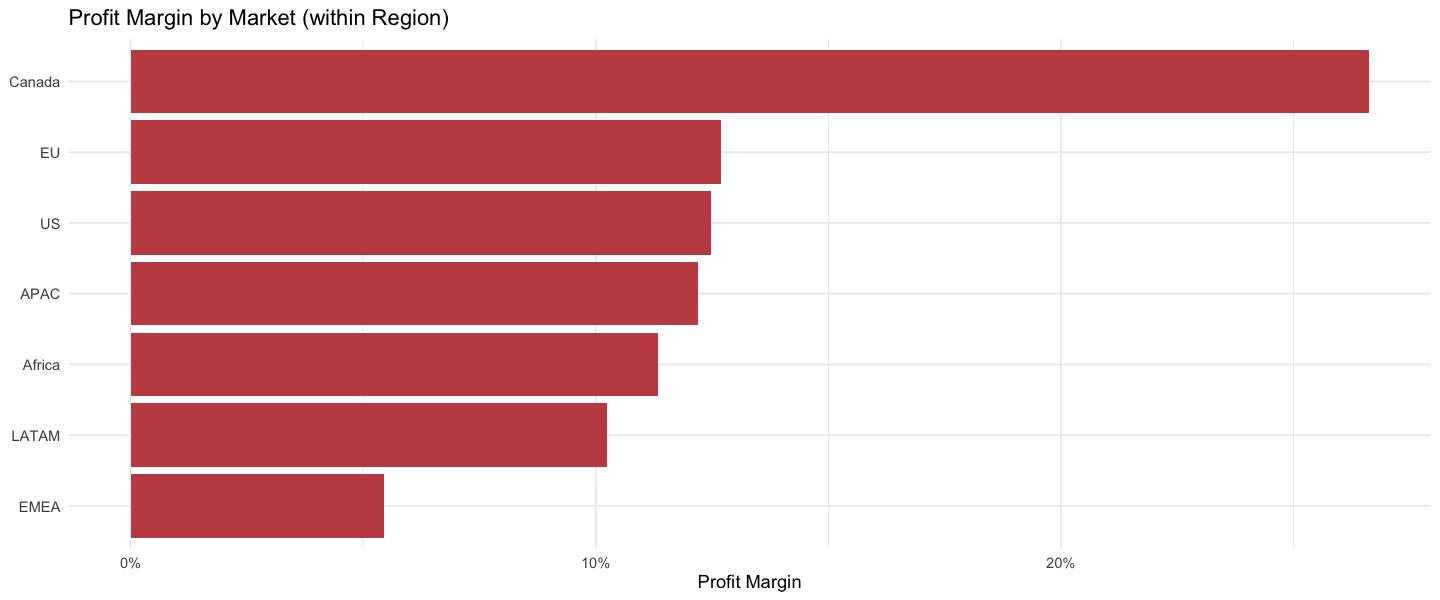

In [44]:
market_margin <- orders %>%
    group_by(market) %>%
    summarise(
        total_sales  = sum(sales),
        total_profit = sum(profit),
        profit_margin = total_profit / total_sales,
        .groups = "drop"
    )

options(repr.plot.width = 12, repr.plot.height = 5)

ggplot(market_margin,
        aes(x = reorder(market, profit_margin), y = profit_margin)) +
    geom_col(fill = "#C44E52") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    labs(
        title = "Profit Margin by Market (within Region)",
        x = NULL,
        y = "Profit Margin"
    ) +
    theme_minimal()

### Market share of global sales

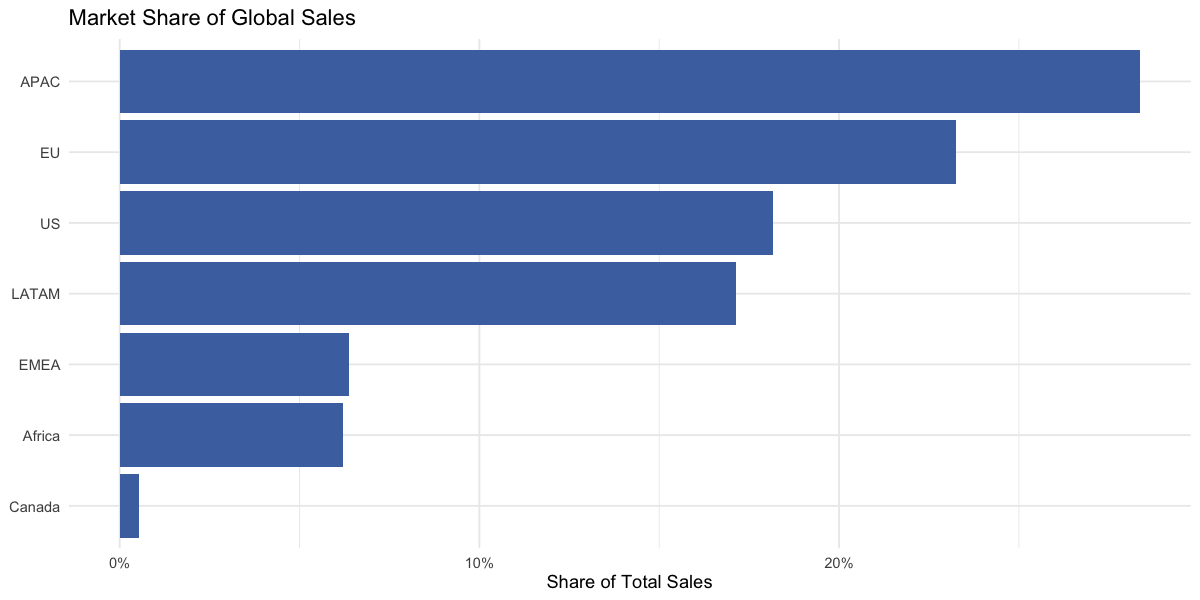

In [45]:
market_sales <- orders %>%
    group_by(market) %>%
    summarise(
        total_sales  = sum(sales),
        total_profit = sum(profit),
        orders       = n_distinct(order_id),
        profit_margin = total_profit / total_sales
    )

market_sales <- market_sales %>%
    mutate(share = total_sales / sum(total_sales))

options(repr.plot.width = 10, repr.plot.height = 5)

ggplot(market_sales,
        aes(x = reorder(market, share), y = share)) +
    geom_col(fill = "#4C72B0") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    labs(
        title = "Market Share of Global Sales",
        x = NULL,
        y = "Share of Total Sales"
    ) +
    theme_minimal()


# Country Performance within Markets

### Top/Bottom N Countries by Sales (per market)

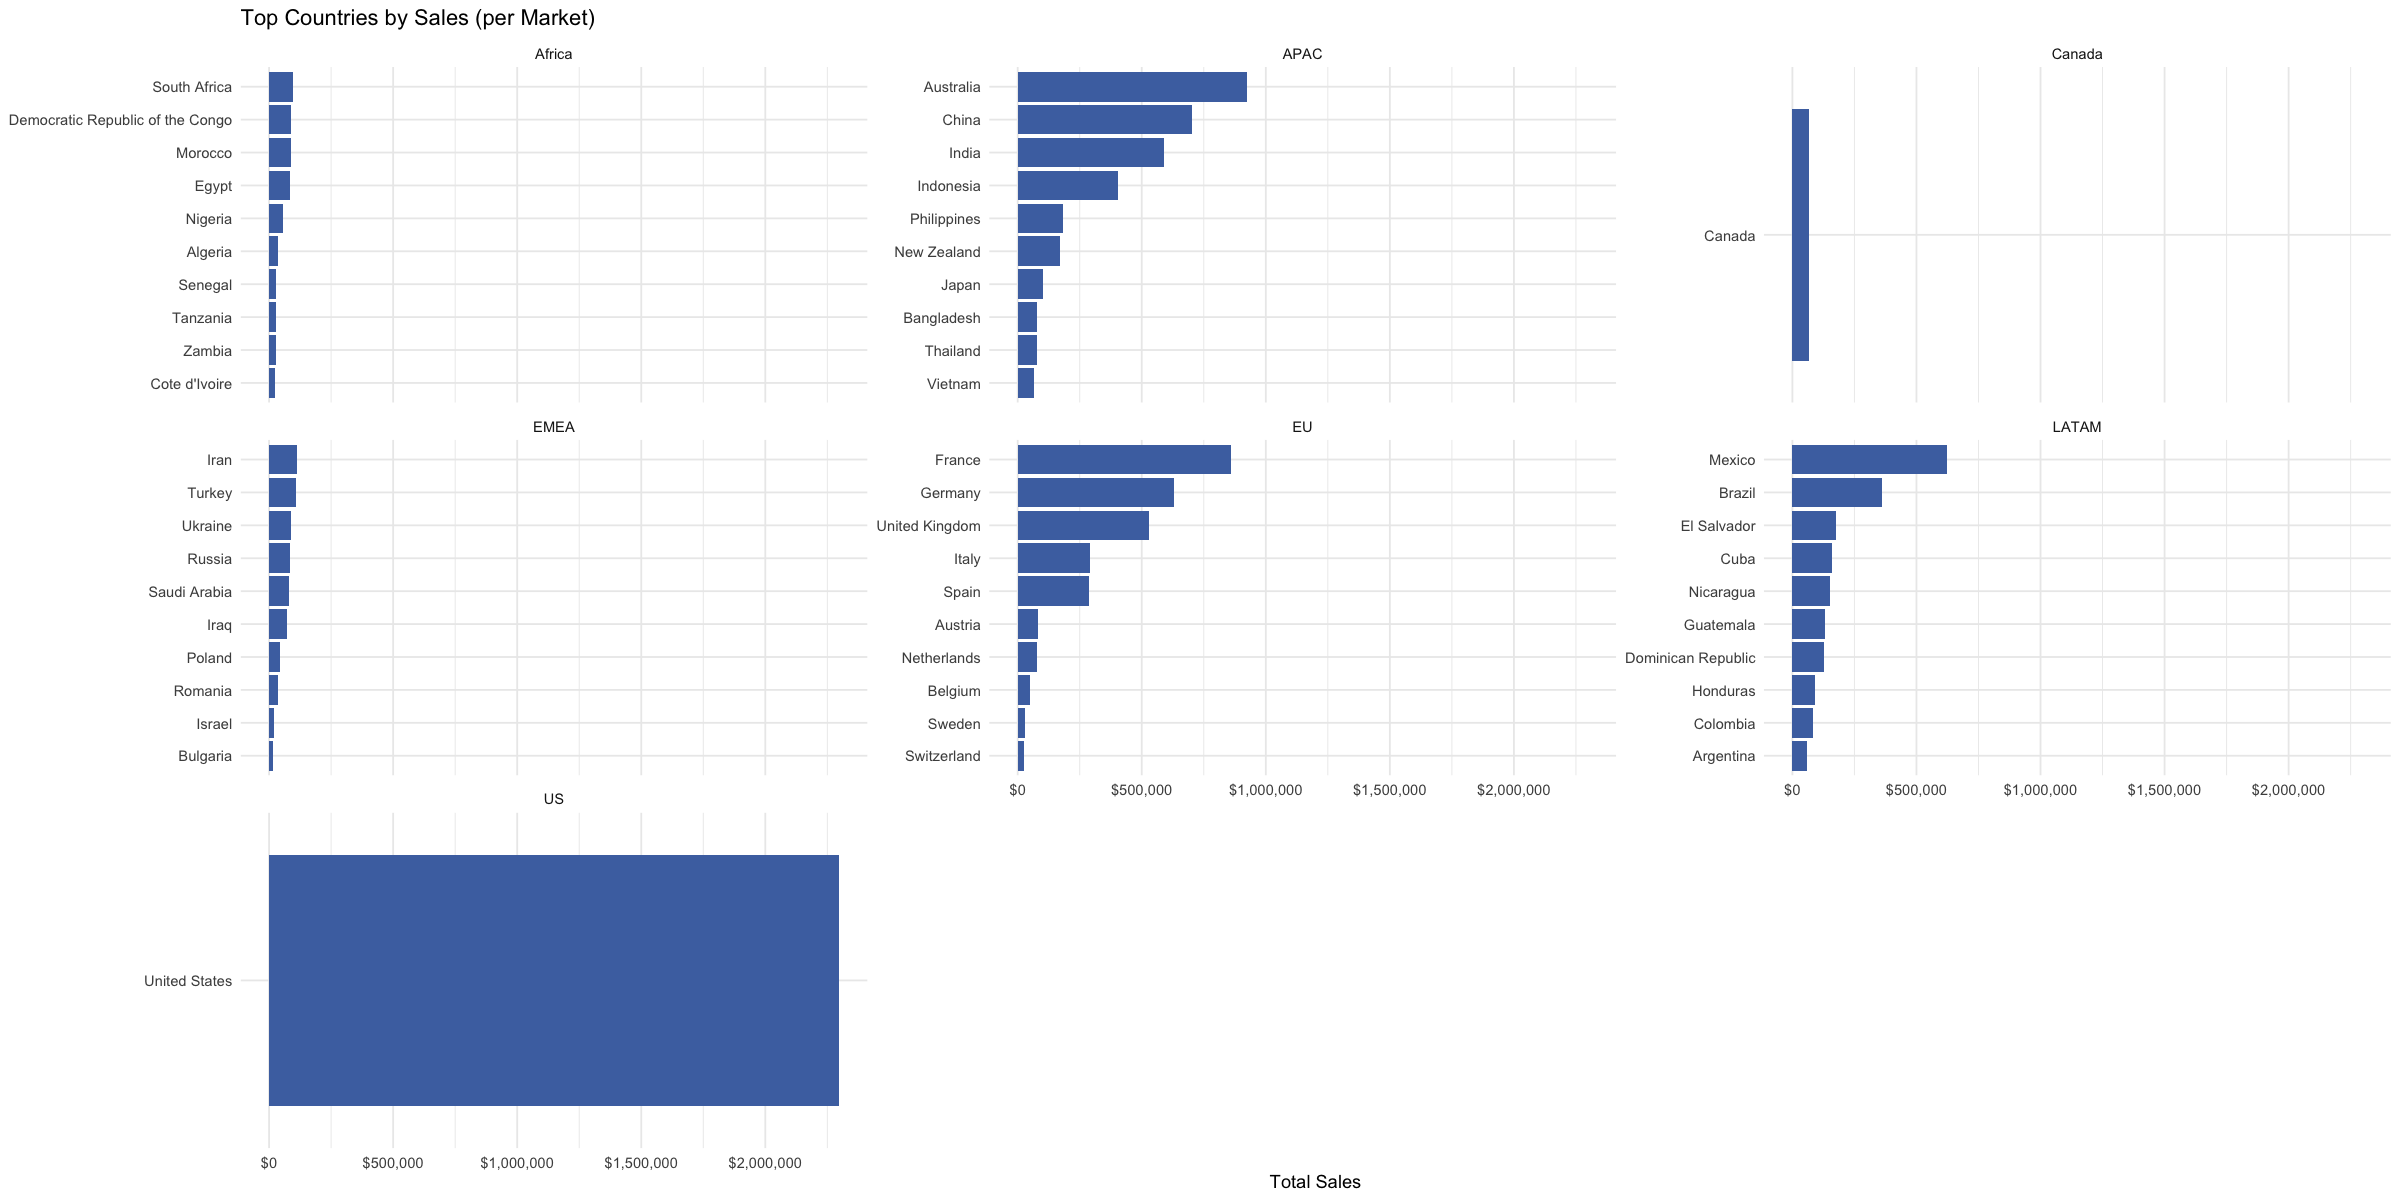

In [46]:
N <- 10

country_sales_market <- orders %>%
    group_by(market, country) %>%
    summarise(total_sales = sum(sales), .groups = "drop")

top_countries <- country_sales_market %>%
    group_by(market) %>%
    slice_max(total_sales, n = N) %>%
    ungroup()

bottom_countries <- country_sales_market %>%
    group_by(market) %>%
    slice_min(total_sales, n = N) %>%
    ungroup()

options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(top_countries,
        aes(x = reorder(country, total_sales), y = total_sales)) +
    geom_col(fill = "#4C72B0") +
    coord_flip() +
    facet_wrap(~ market, scales = "free_y") +
    scale_y_continuous(labels = scales::dollar_format()) +
    labs(
        title = "Top Countries by Sales (per Market)",
        x = NULL,
        y = "Total Sales"
    ) +
    theme_minimal()

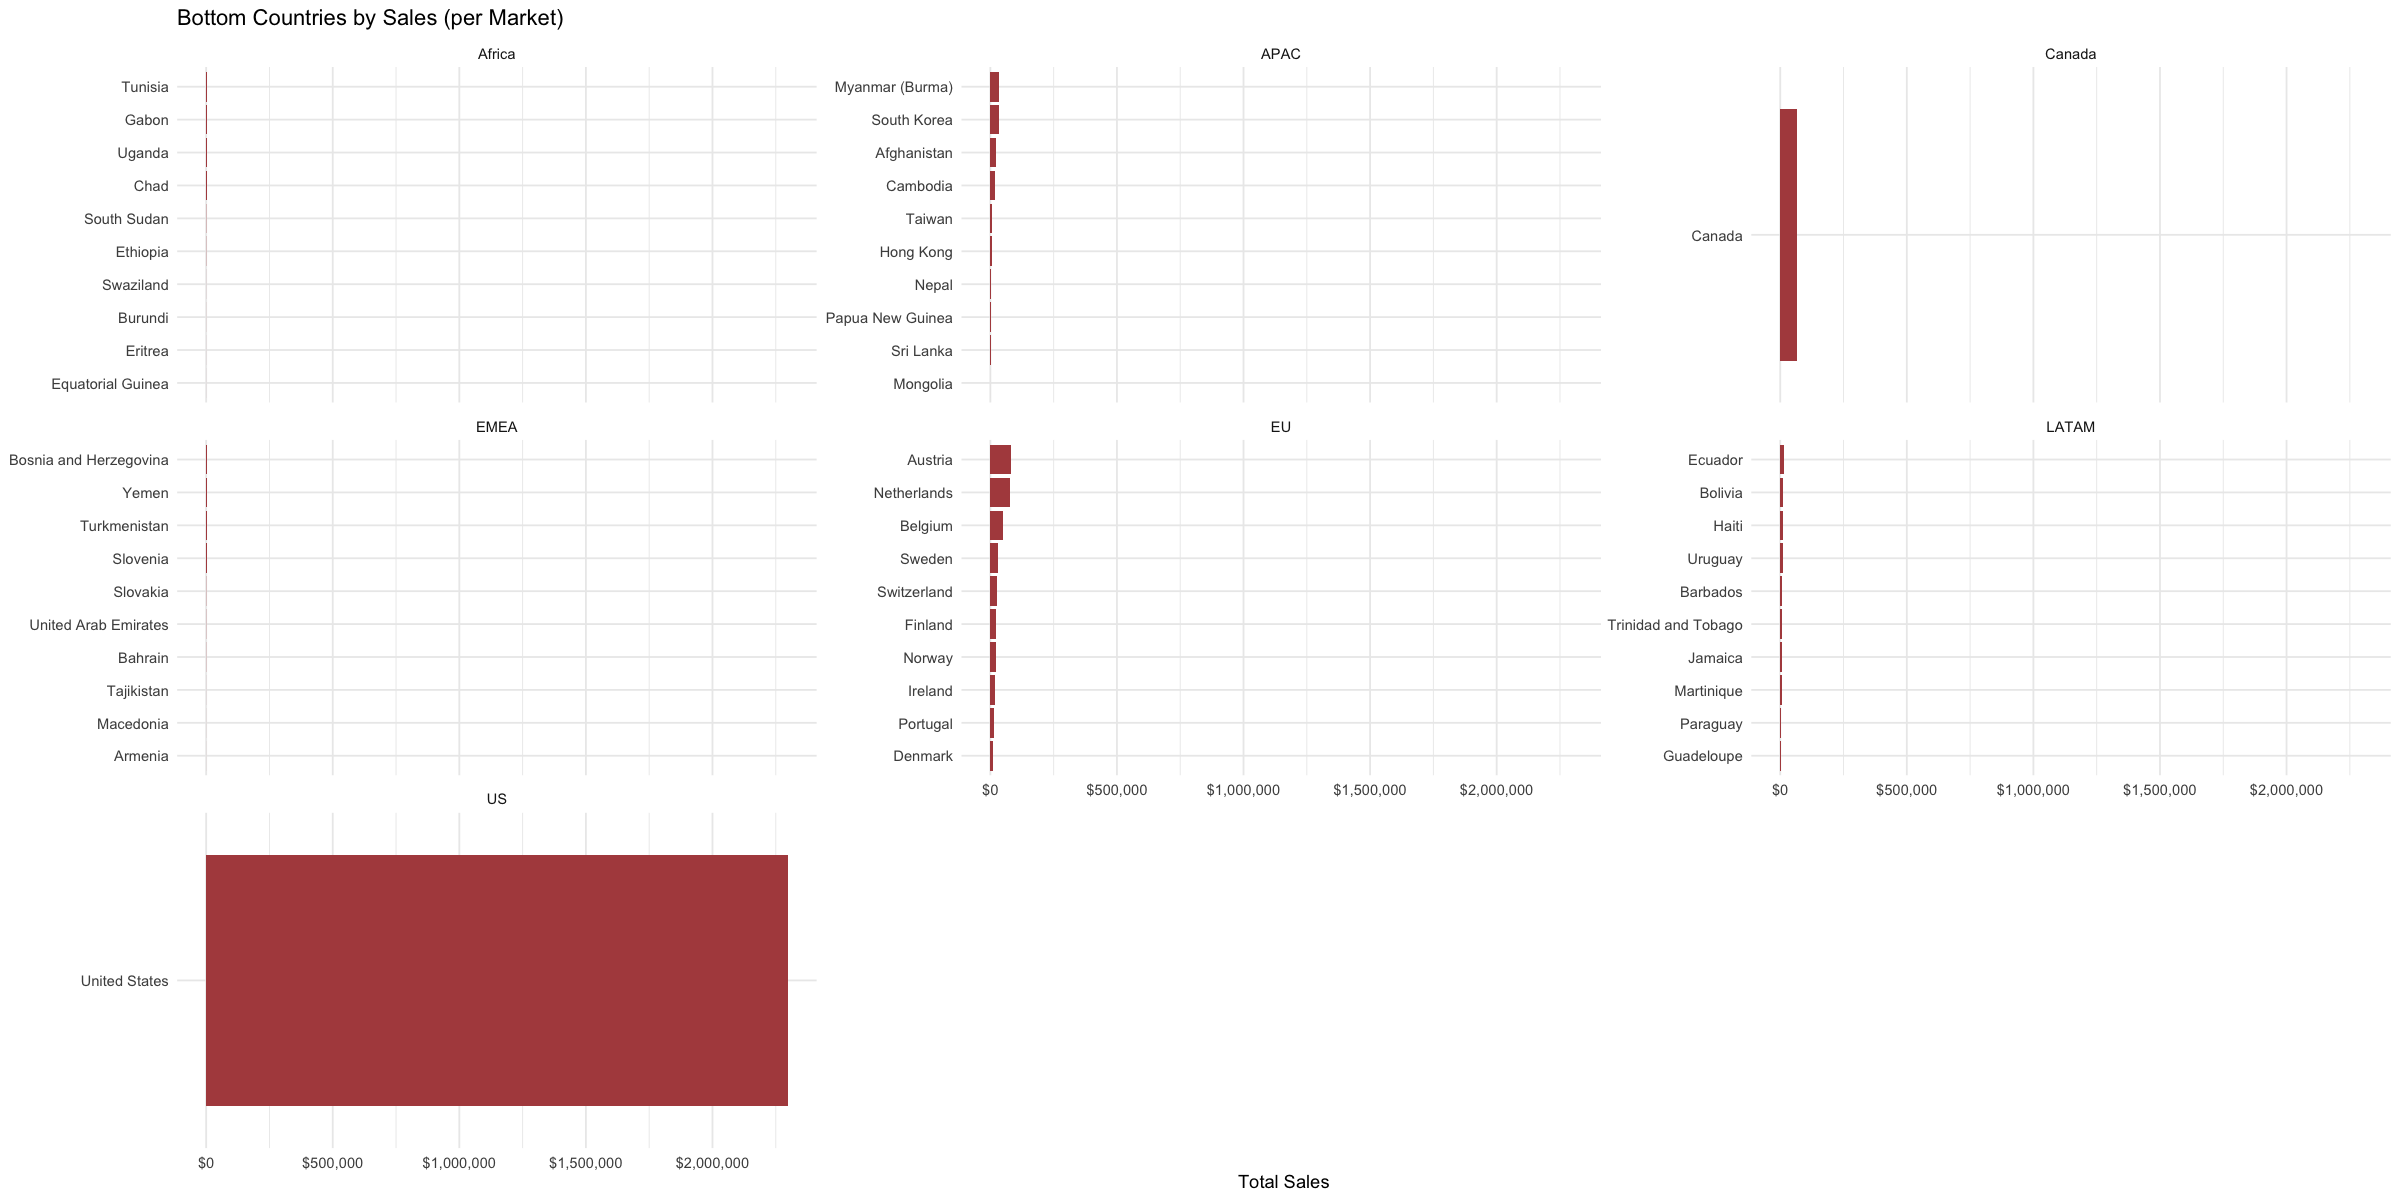

In [47]:
ggplot(bottom_countries,
        aes(x = reorder(country, total_sales), y = total_sales)) +
    geom_col(fill = "#b04c4cff") +
    coord_flip() +
    facet_wrap(~ market, scales = "free_y") +
    scale_y_continuous(labels = scales::dollar_format()) +
    labs(
        title = "Bottom Countries by Sales (per Market)",
        x = NULL,
        y = "Total Sales"
    ) +
    theme_minimal()

### Profit Margin by Country (Top/Bottom N only)

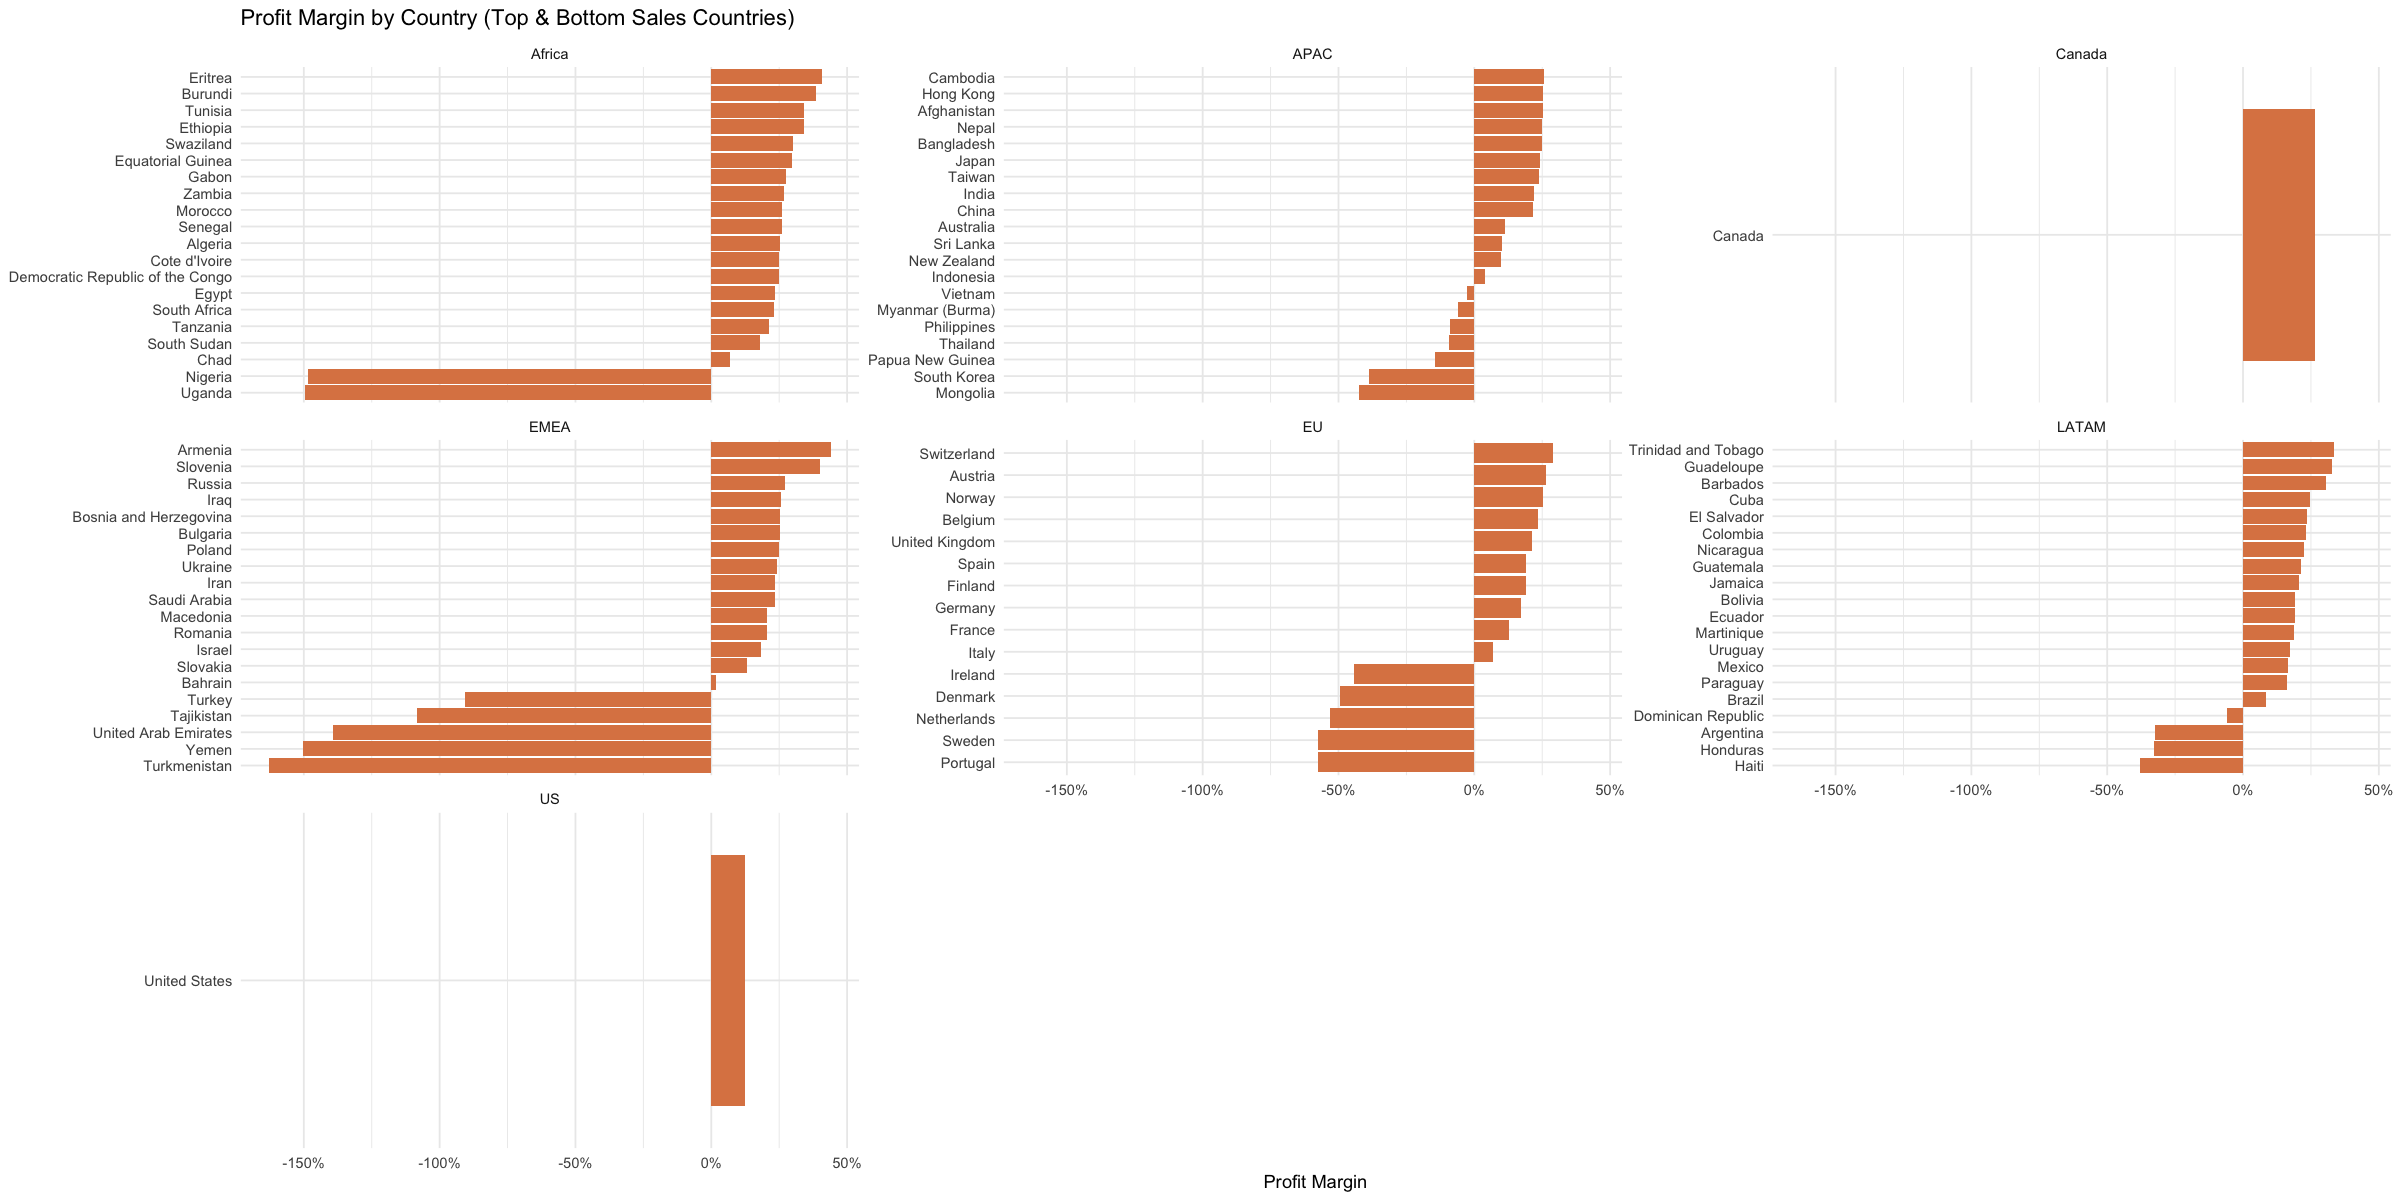

In [48]:
country_margin <- orders %>%
    group_by(market, country) %>%
    summarise(
        total_sales  = sum(sales),
        total_profit = sum(profit),
        profit_margin = total_profit / total_sales,
        .groups = "drop"
    )

focus_countries <- bind_rows(
    top_countries %>% select(market, country),
    bottom_countries %>% select(market, country)
  ) %>%
    distinct()

country_margin_focus <- country_margin %>%
    inner_join(focus_countries, by = c("market", "country"))

ggplot(country_margin_focus,
        aes(x = reorder(country, profit_margin), y = profit_margin)) +
    geom_col(fill = "#DD8452") +
    coord_flip() +
    facet_wrap(~ market, scales = "free_y") +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    labs(
        title = "Profit Margin by Country (Top & Bottom Sales Countries)",
        x = NULL,
        y = "Profit Margin"
    ) +
    theme_minimal()

### Sales vs Profit by Country

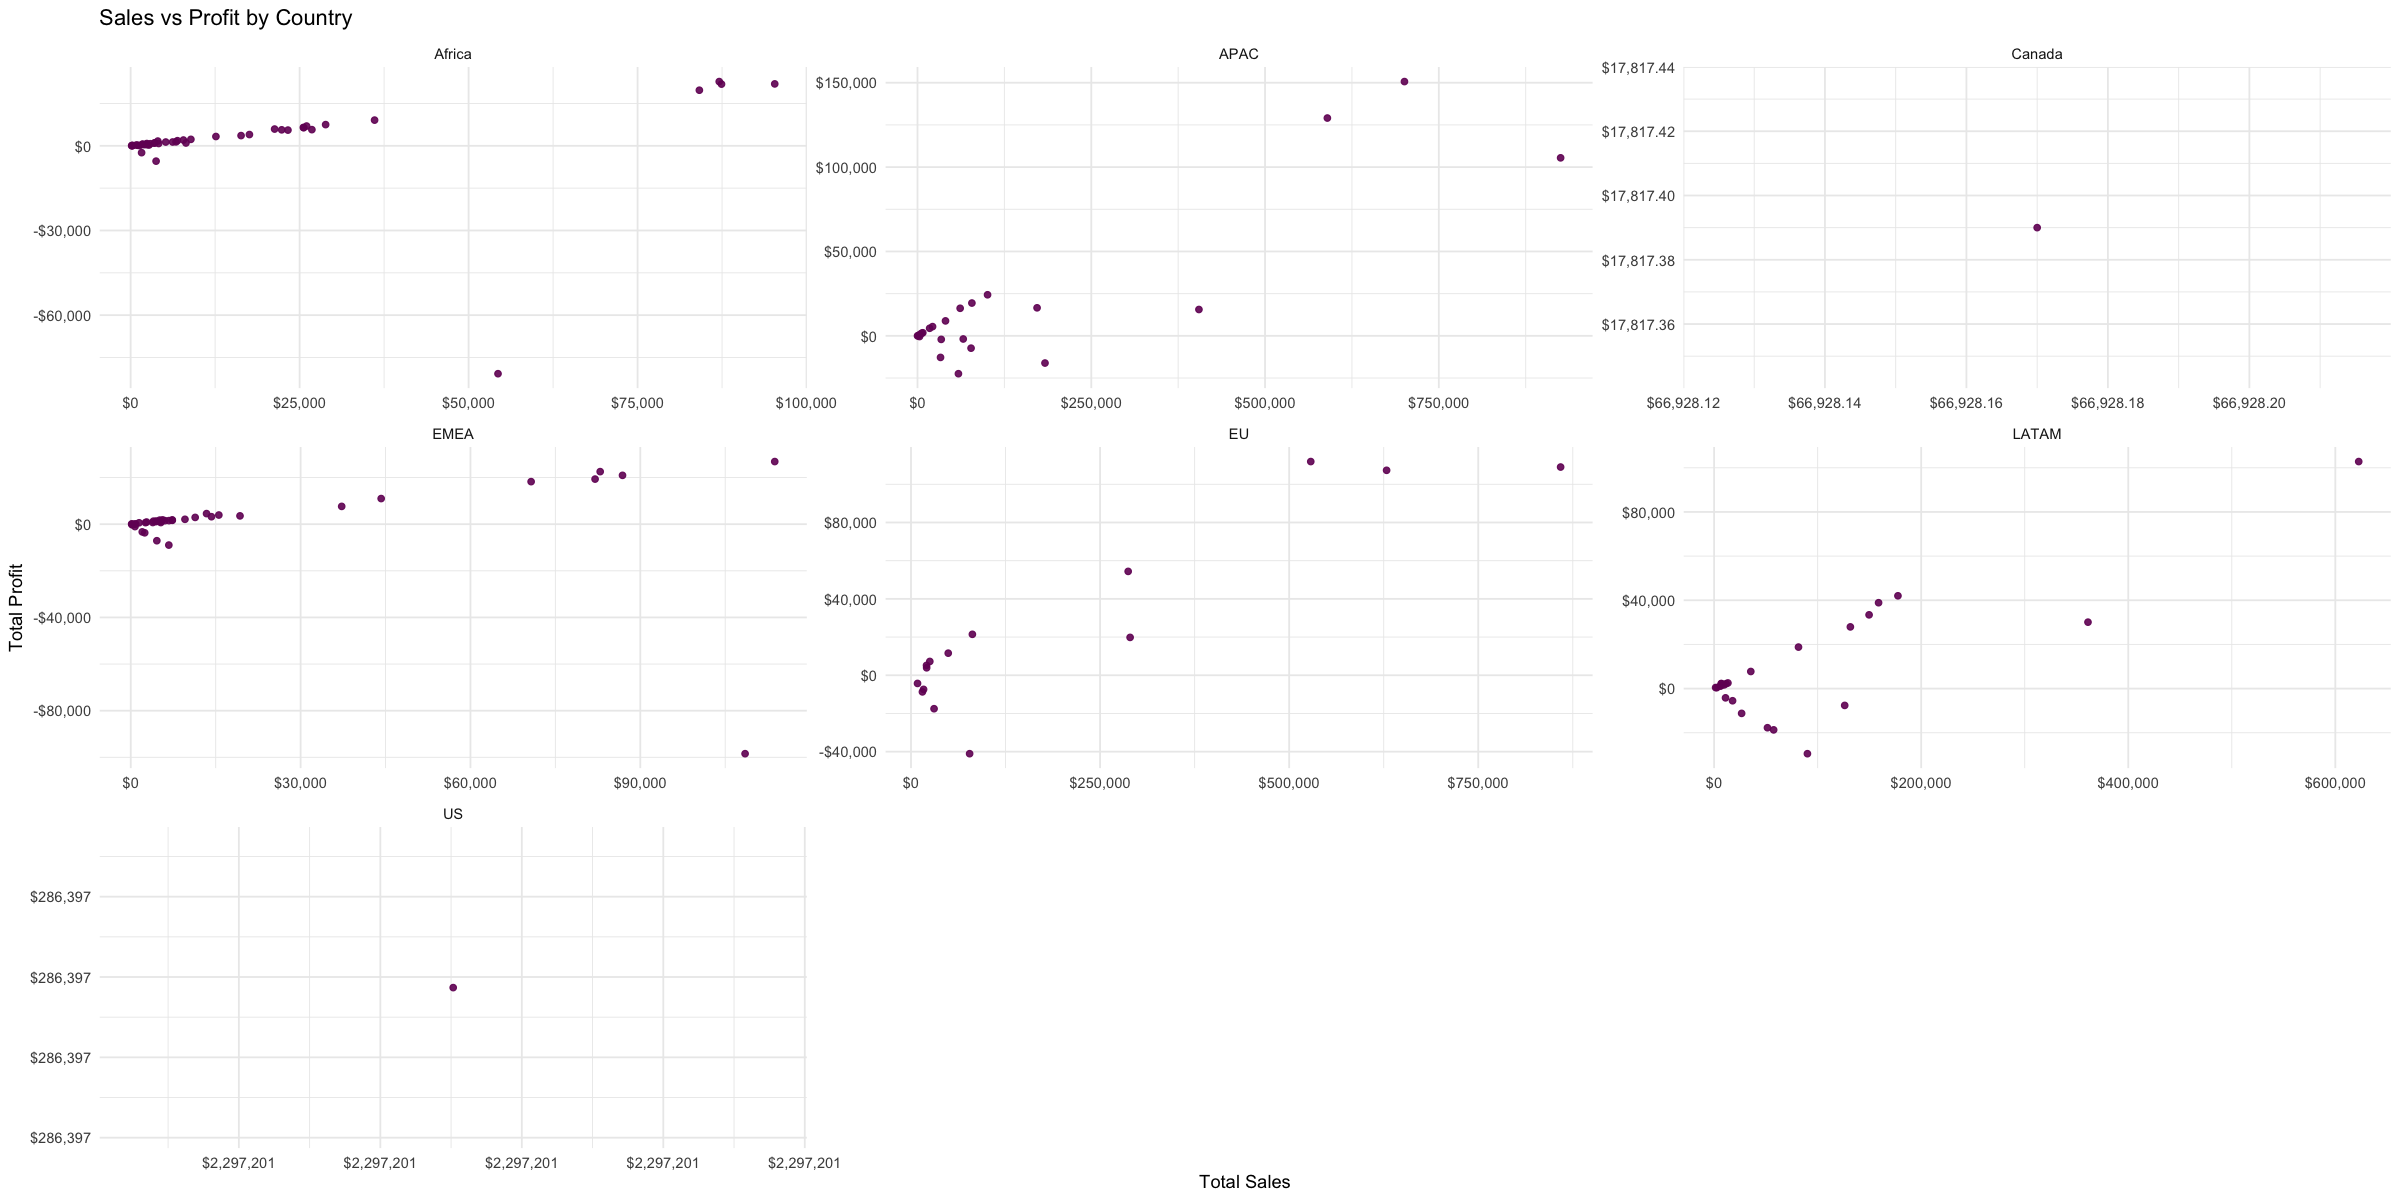

In [49]:
ggplot(country_margin,
       aes(x = total_sales, y = total_profit)) +
    geom_point(alpha = 0.9, color = "#730064ff") +
    facet_wrap(~ market, scales = "free") +
    scale_x_continuous(labels = scales::dollar_format()) +
    scale_y_continuous(labels = scales::dollar_format()) +
    labs(
        title = "Sales vs Profit by Country",
        x = "Total Sales",
        y = "Total Profit"
    ) +
    theme_minimal()

# Geographic Risk & Volatility

### Profit Margin Distribution by Market

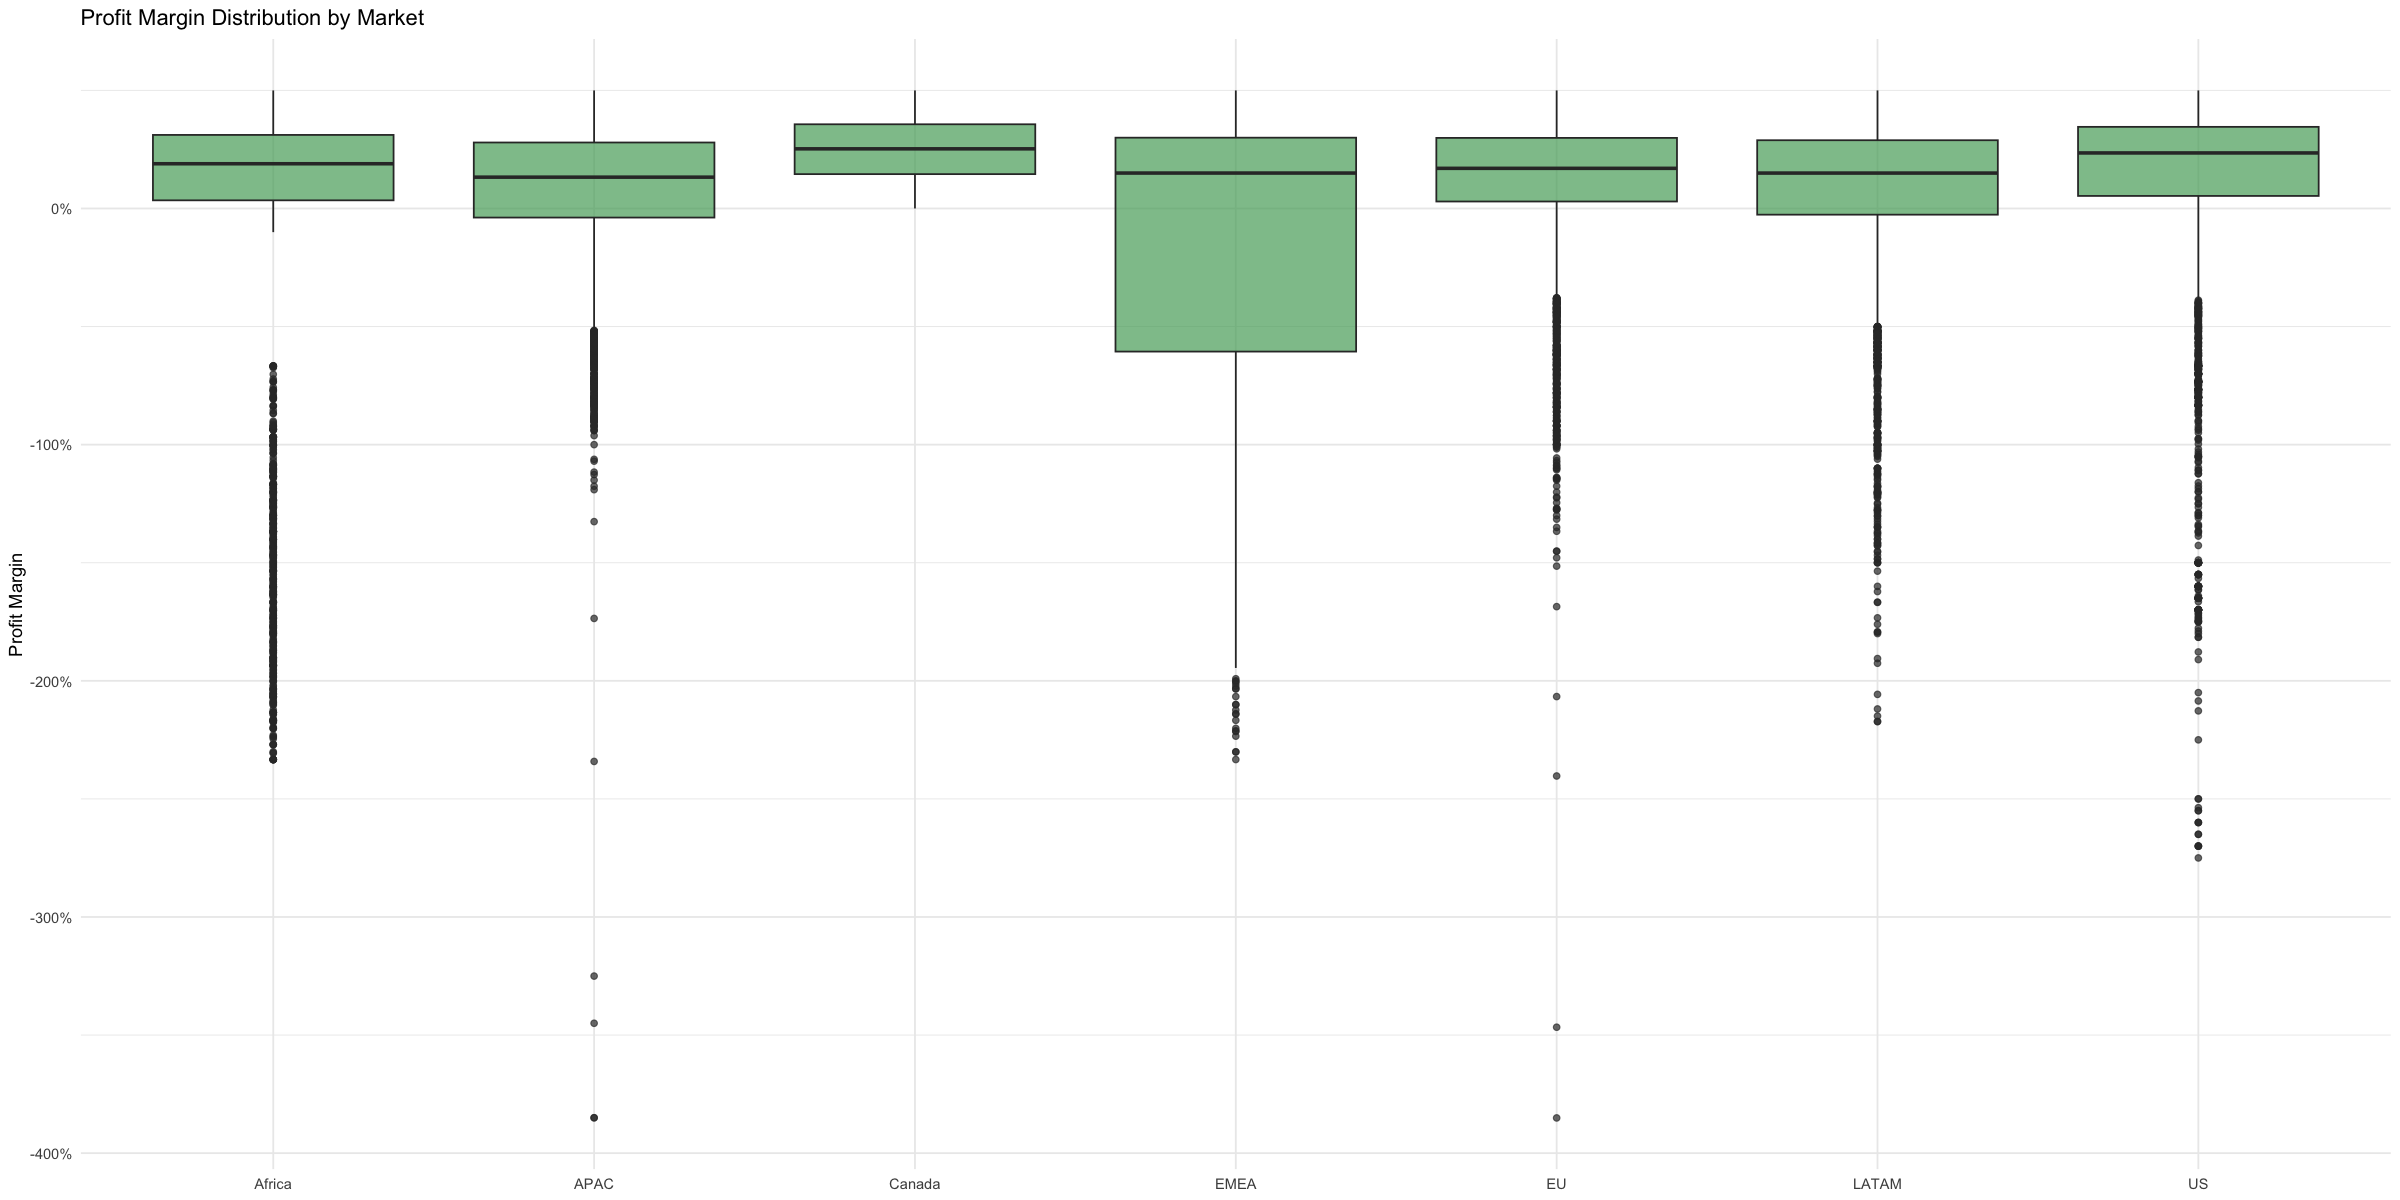

In [50]:
market_margin <- orders %>%
    group_by(market, order_id) %>%
    summarise(
        sales  = sum(sales),
        profit = sum(profit),
        profit_margin = profit / sales,
        .groups = "drop"
    )

ggplot(market_margin,
        aes(x = market, y = profit_margin)) +
    geom_boxplot(fill = "#55A868", alpha = 0.7) +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Profit Margin Distribution by Market",
        x = NULL,
        y = "Profit Margin"
    ) +
    theme_minimal()


### Return Rate by Region / Market

In [56]:
orders_with_returns <- orders %>%
    left_join(
        returns %>%
        distinct(order_id) %>%   
        mutate(returned = 1),
        by = "order_id"
    ) %>%
    mutate(returned = if_else(is.na(returned), 0, returned))

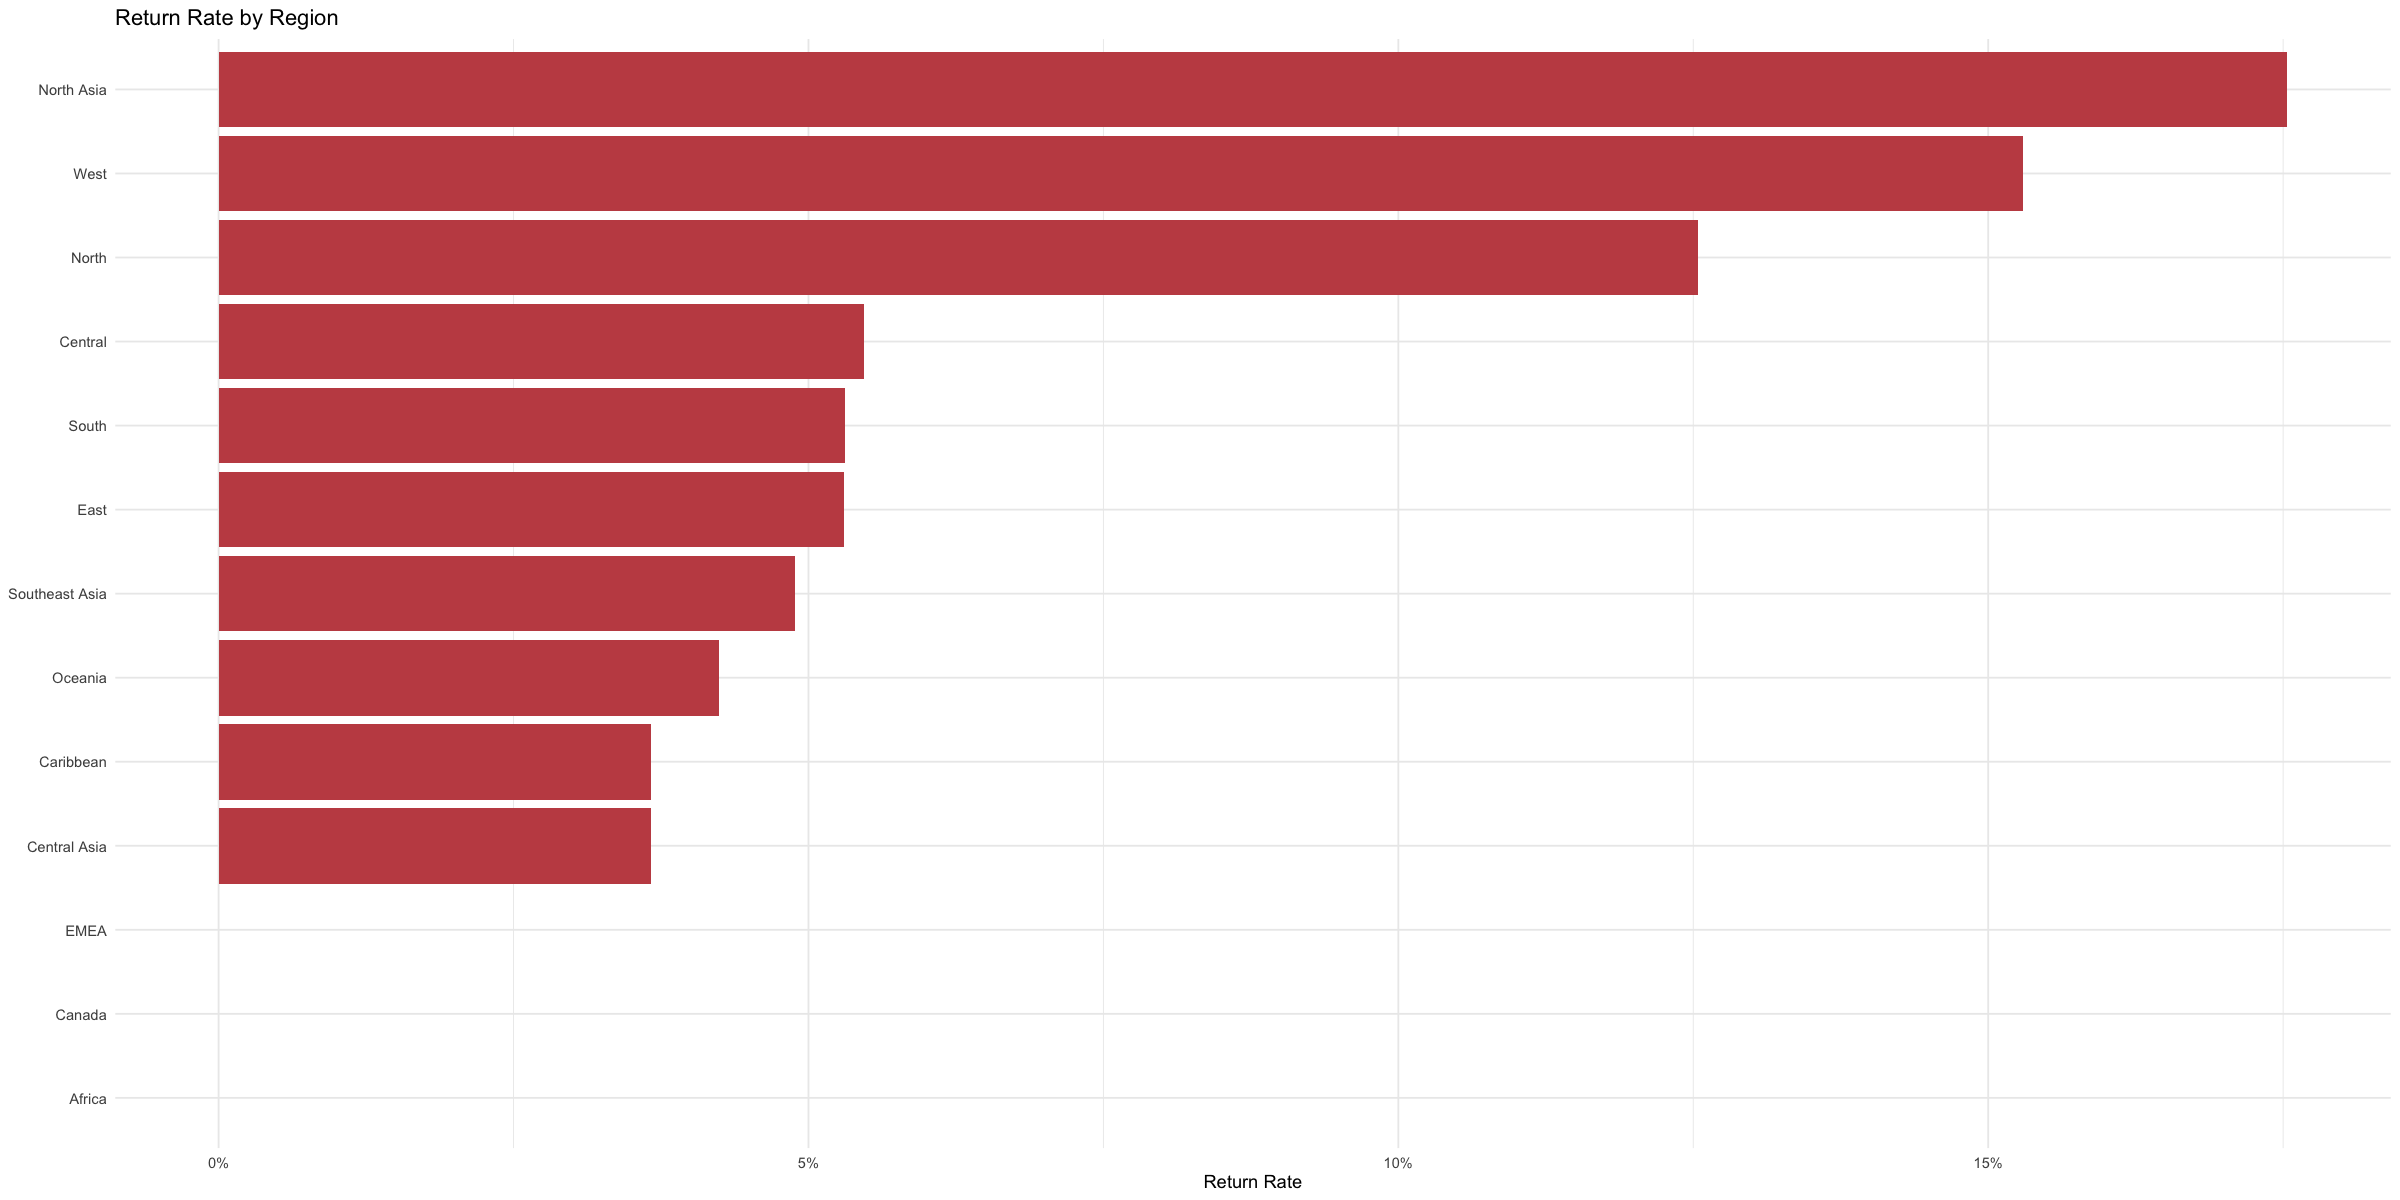

In [57]:
returns_region <- orders_with_returns %>%
    group_by(region) %>%
    summarise(return_rate = mean(returned), .groups = "drop")

ggplot(returns_region,
        aes(x = reorder(region, return_rate), y = return_rate)) +
    geom_col(fill = "#C44E52") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Return Rate by Region",
        x = NULL,
        y = "Return Rate"
    ) +
    theme_minimal()

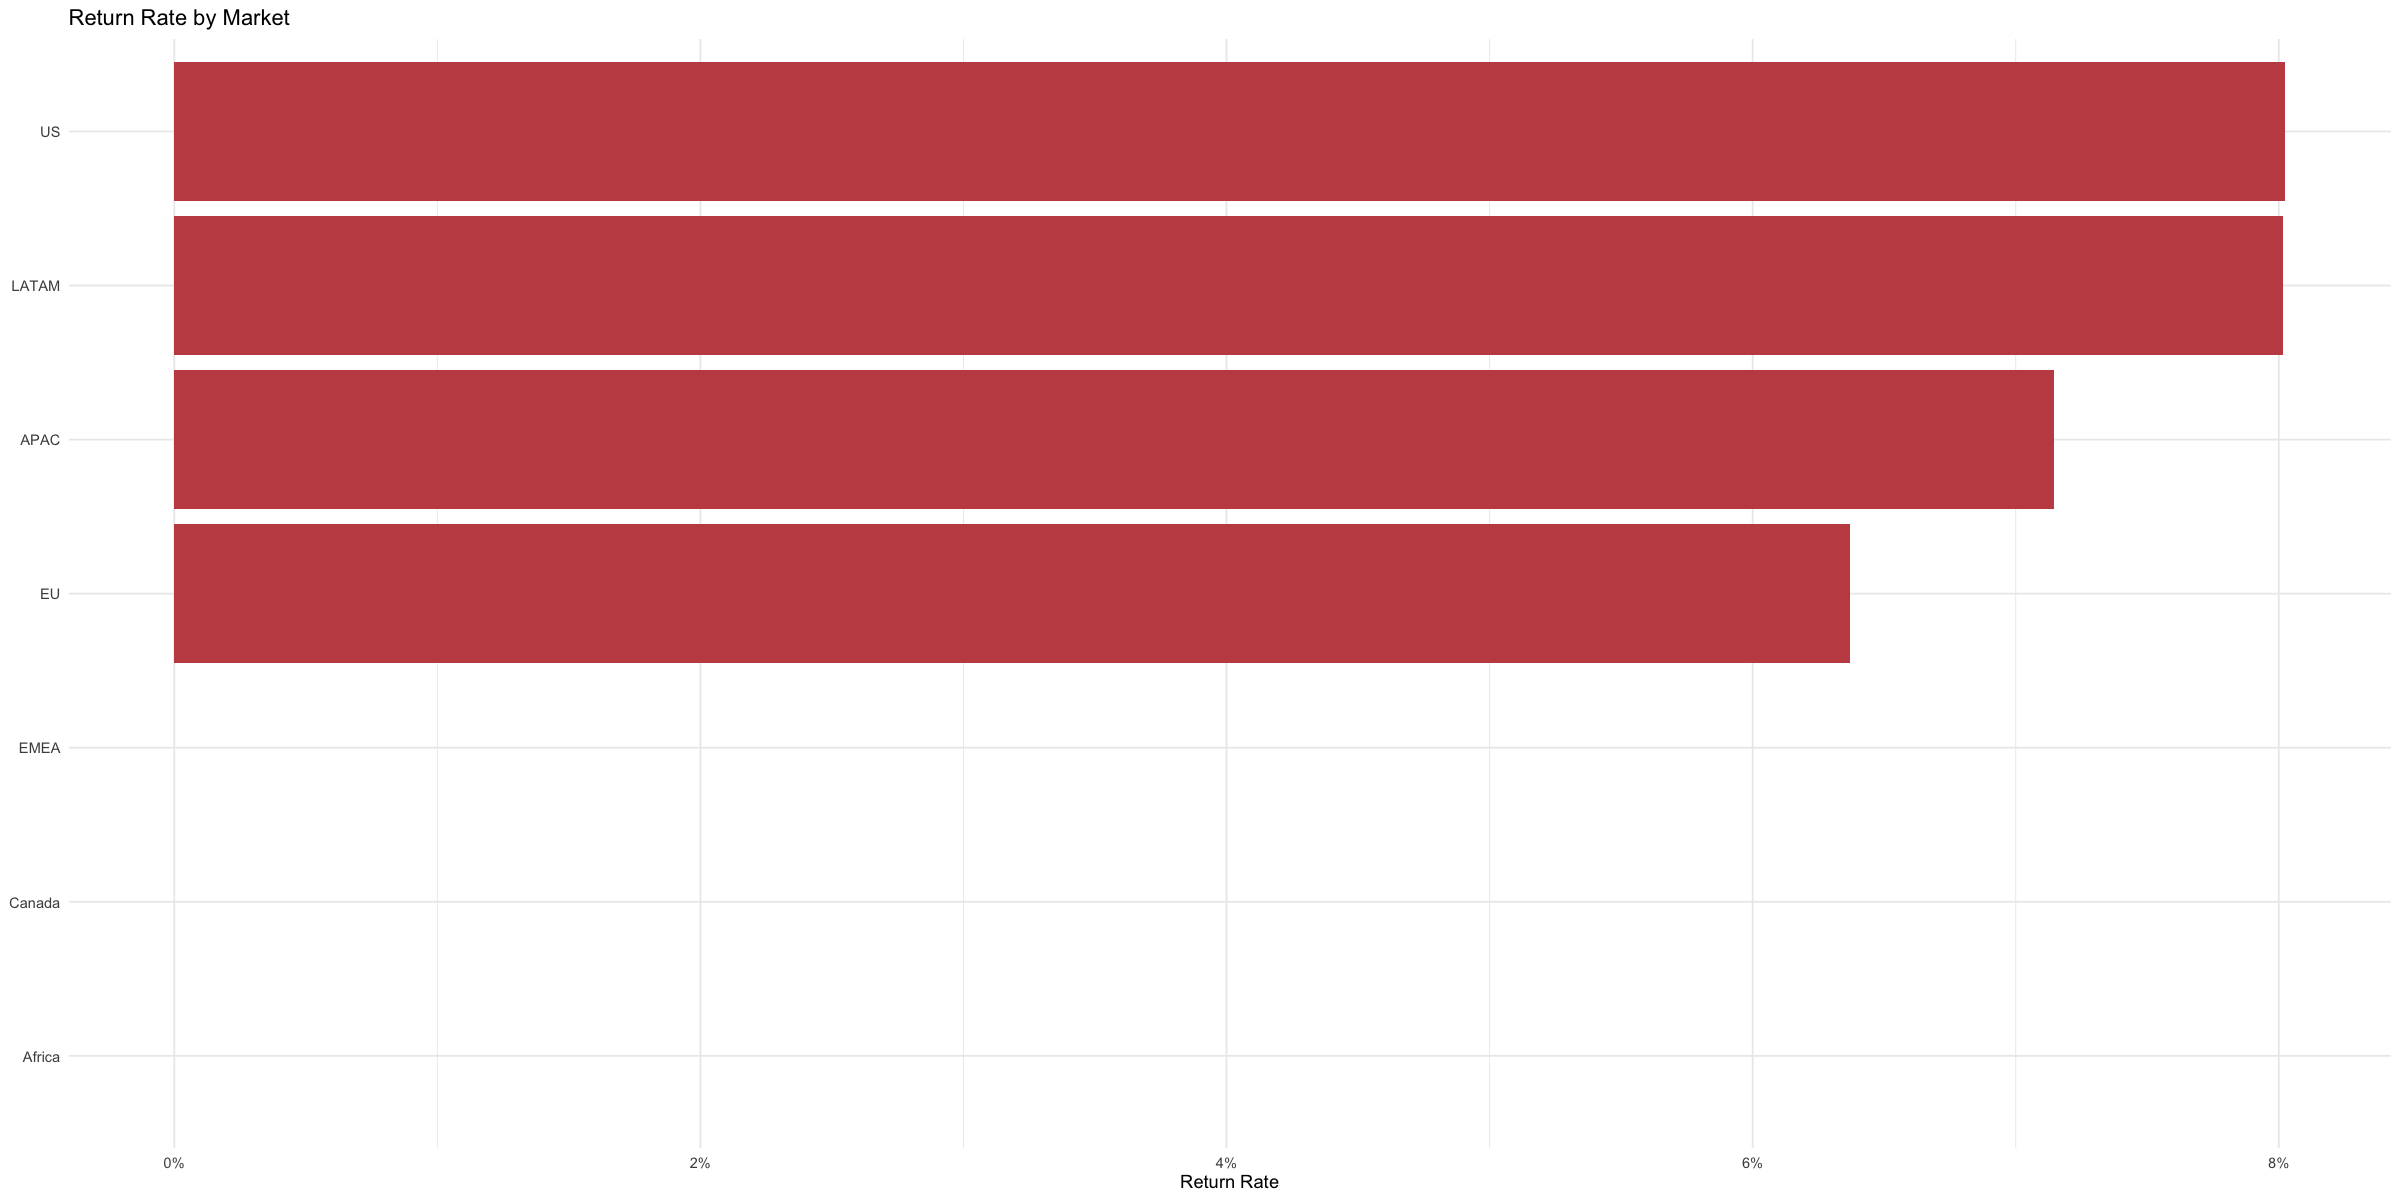

In [58]:
returns_market <- orders_with_returns %>%
    group_by(market) %>%
    summarise(return_rate = mean(returned), .groups = "drop")

ggplot(returns_market,
        aes(x = reorder(market, return_rate), y = return_rate)) +
    geom_col(fill = "#C44E52") +
    coord_flip() +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        title = "Return Rate by Market",
        x = NULL,
        y = "Return Rate"
    ) +
    theme_minimal()

### Discount vs Profit by Region/Market (faceted)

`geom_smooth()` using formula = 'y ~ x'


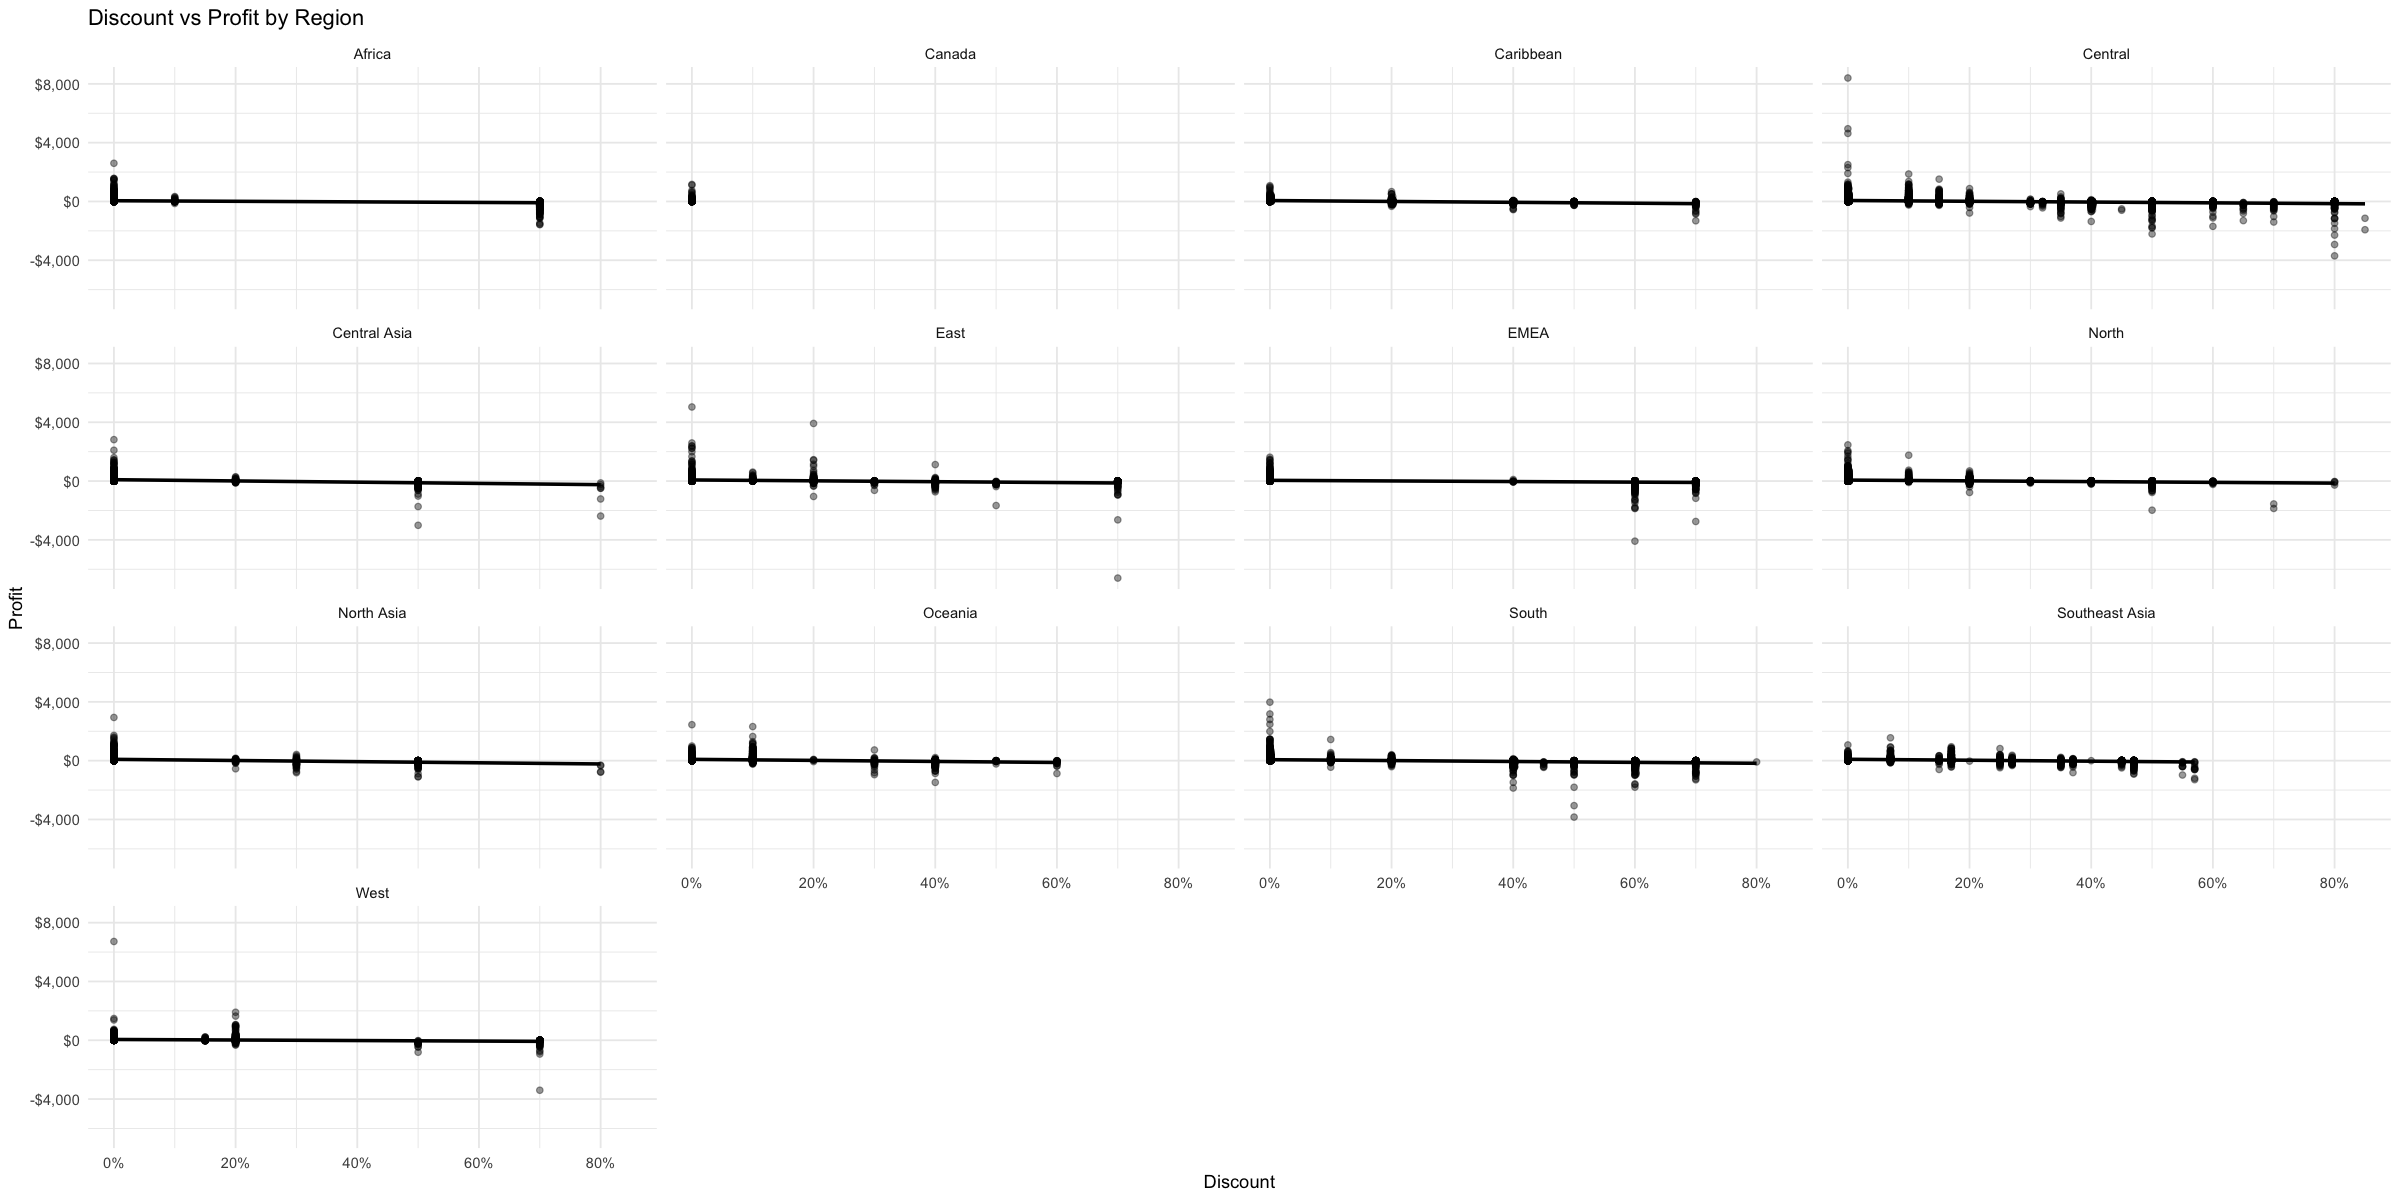

In [59]:
ggplot(orders,
        aes(x = discount, y = profit)) +
    geom_point(alpha = 0.4) +
    geom_smooth(method = "lm", se = FALSE, color = "black") +
    facet_wrap(~ region) +
    scale_y_continuous(labels = scales::dollar_format()) +
    scale_x_continuous(labels = scales::percent_format()) +
    labs(
        title = "Discount vs Profit by Region",
        x = "Discount",
        y = "Profit"
    ) +
    theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


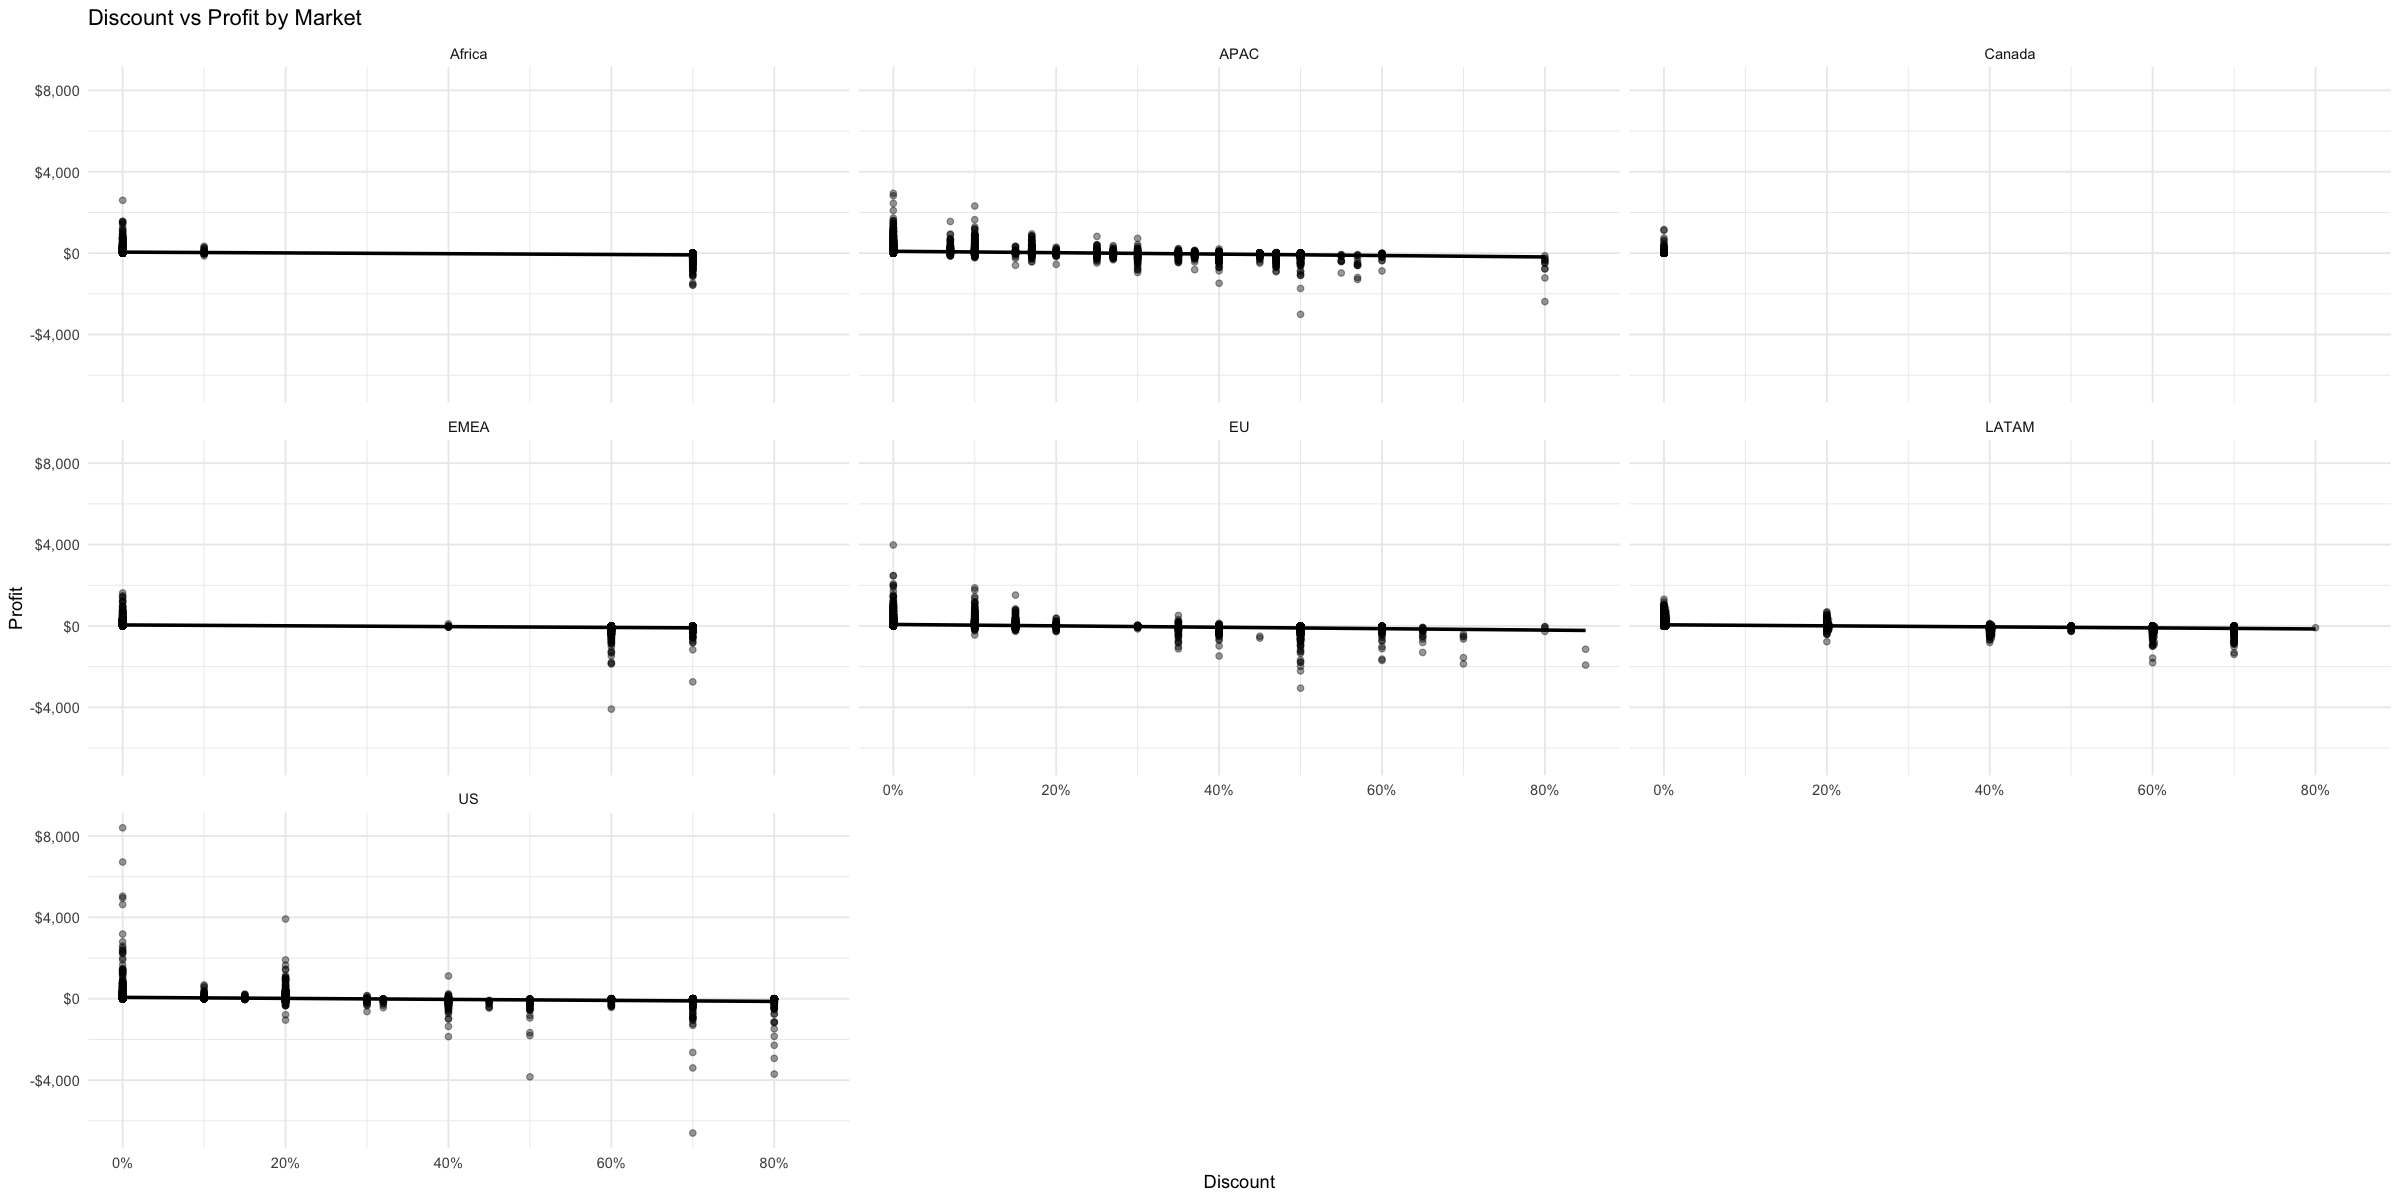

In [60]:
ggplot(orders,
        aes(x = discount, y = profit)) +
    geom_point(alpha = 0.4) +
    geom_smooth(method = "lm", se = FALSE, color = "black") +
    facet_wrap(~ market) +
    scale_y_continuous(labels = scales::dollar_format()) +
    scale_x_continuous(labels = scales::percent_format()) +
    labs(
        title = "Discount vs Profit by Market",
        x = "Discount",
        y = "Profit"
    ) +
    theme_minimal()

# Concentration and Dependency Analysis

### Top X% of Countries vs Market Sales Contribution

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


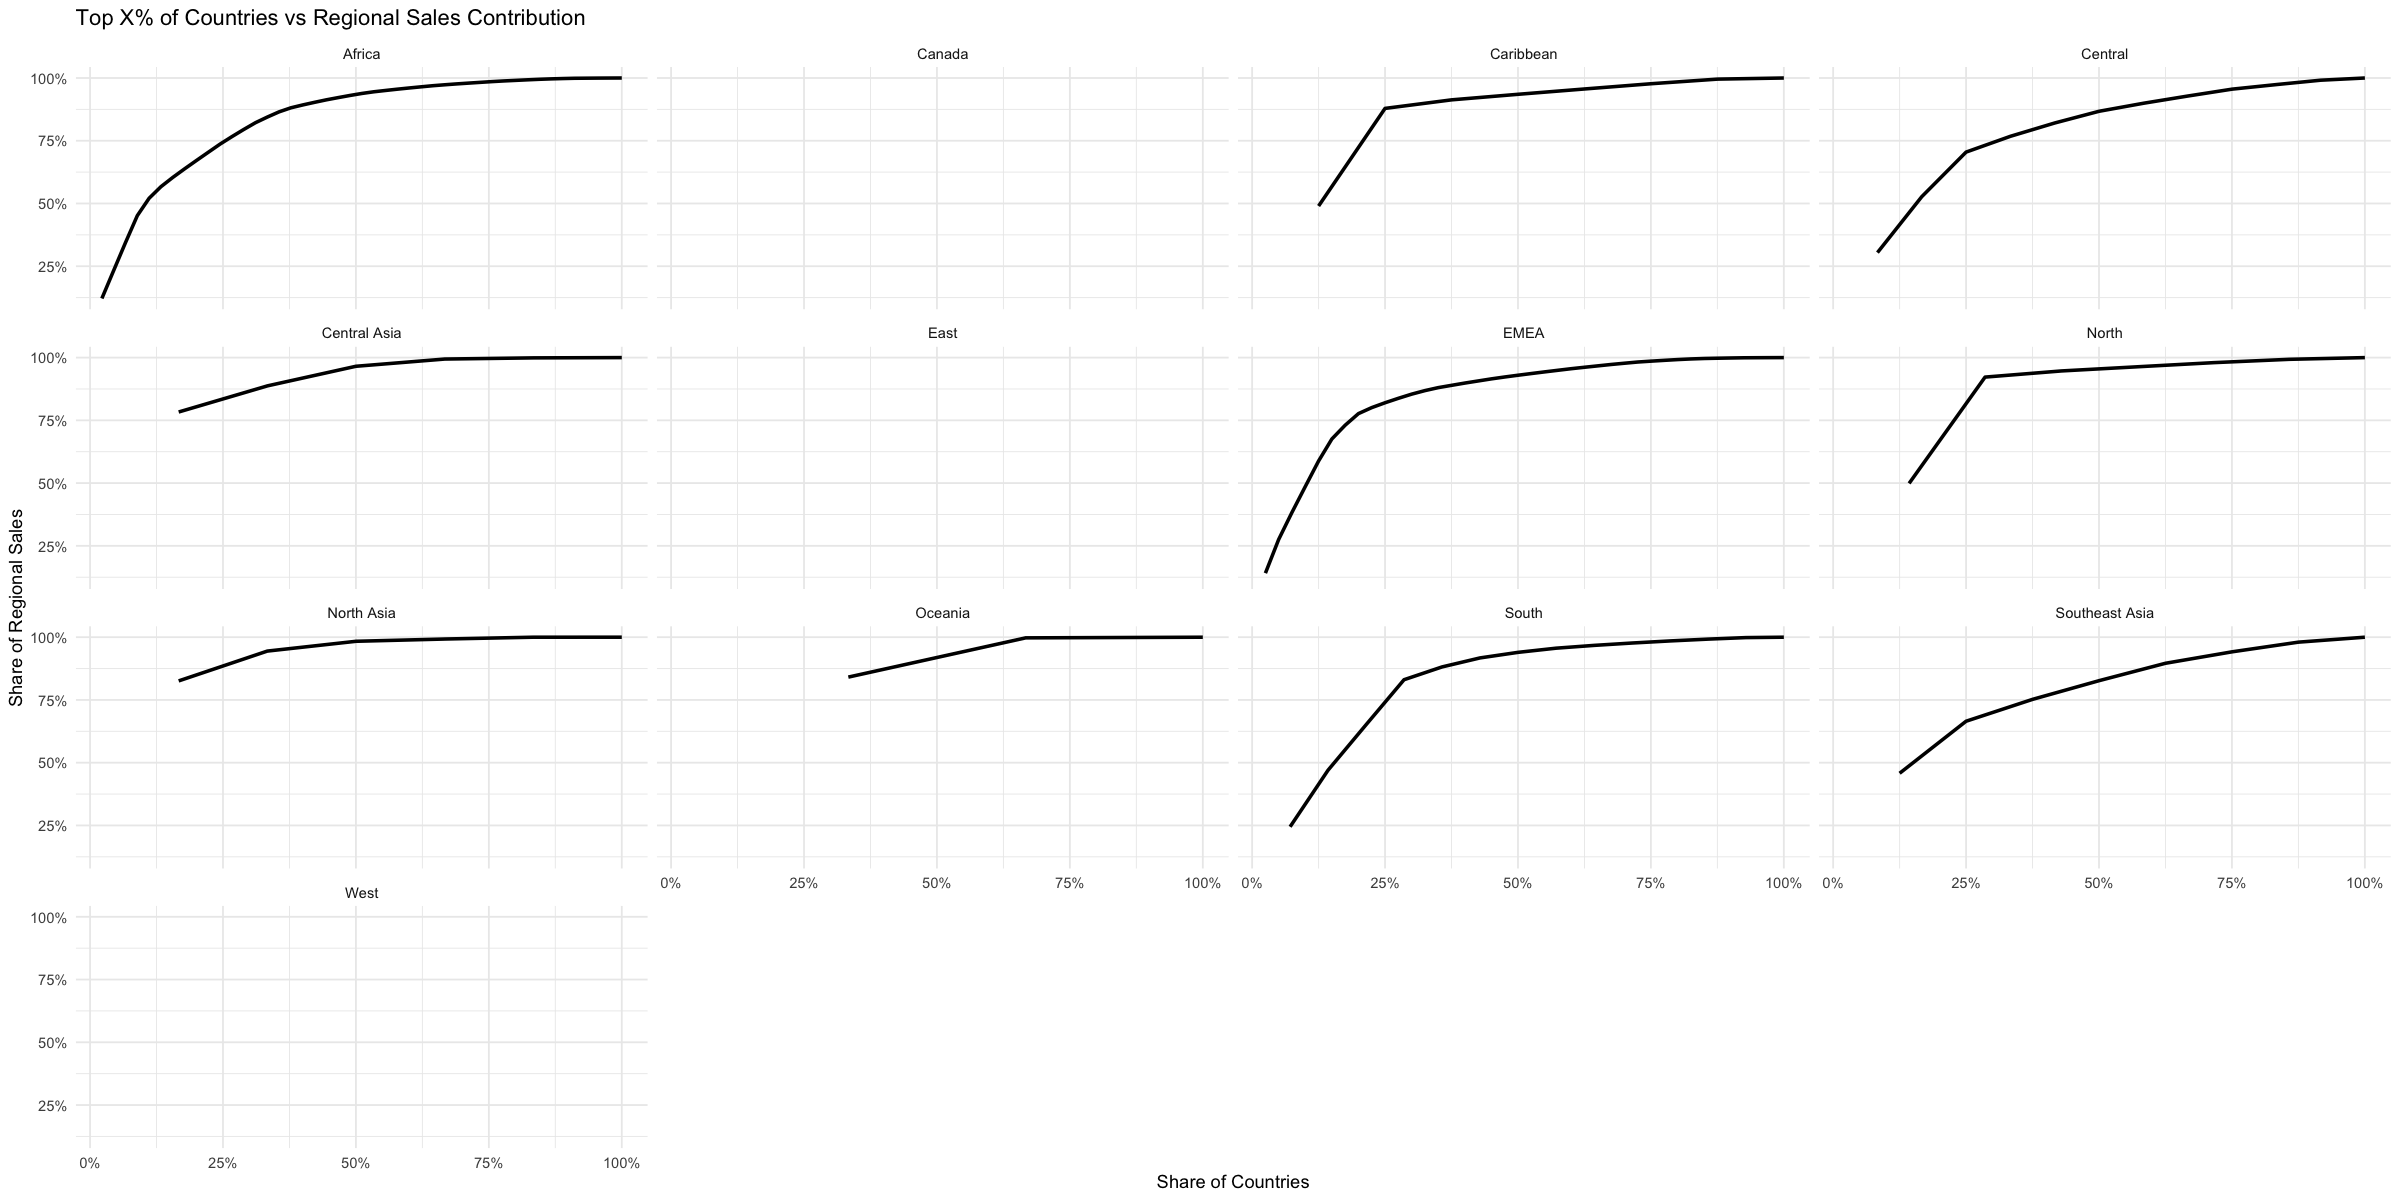

In [64]:
country_region_sales <- orders %>%
    group_by(region, country) %>%
    summarise(total_sales = sum(sales), .groups = "drop") %>%
    group_by(region) %>%
    arrange(region, desc(total_sales)) %>%
    mutate(
        country_rank = row_number(),
        country_share = country_rank / n(),
        sales_share   = cumsum(total_sales) / sum(total_sales)
    )

ggplot(country_region_sales,
        aes(x = country_share, y = sales_share)) +
    geom_line(size = 1) +
    facet_wrap(~ region) +
    scale_x_continuous(labels = scales::percent) +
    scale_y_continuous(labels = scales::percent) +
    labs(
        title = "Top X% of Countries vs Regional Sales Contribution",
        x = "Share of Countries",
        y = "Share of Regional Sales"
    ) +
    theme_minimal()

### Market concentration curves (Pareto-style)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


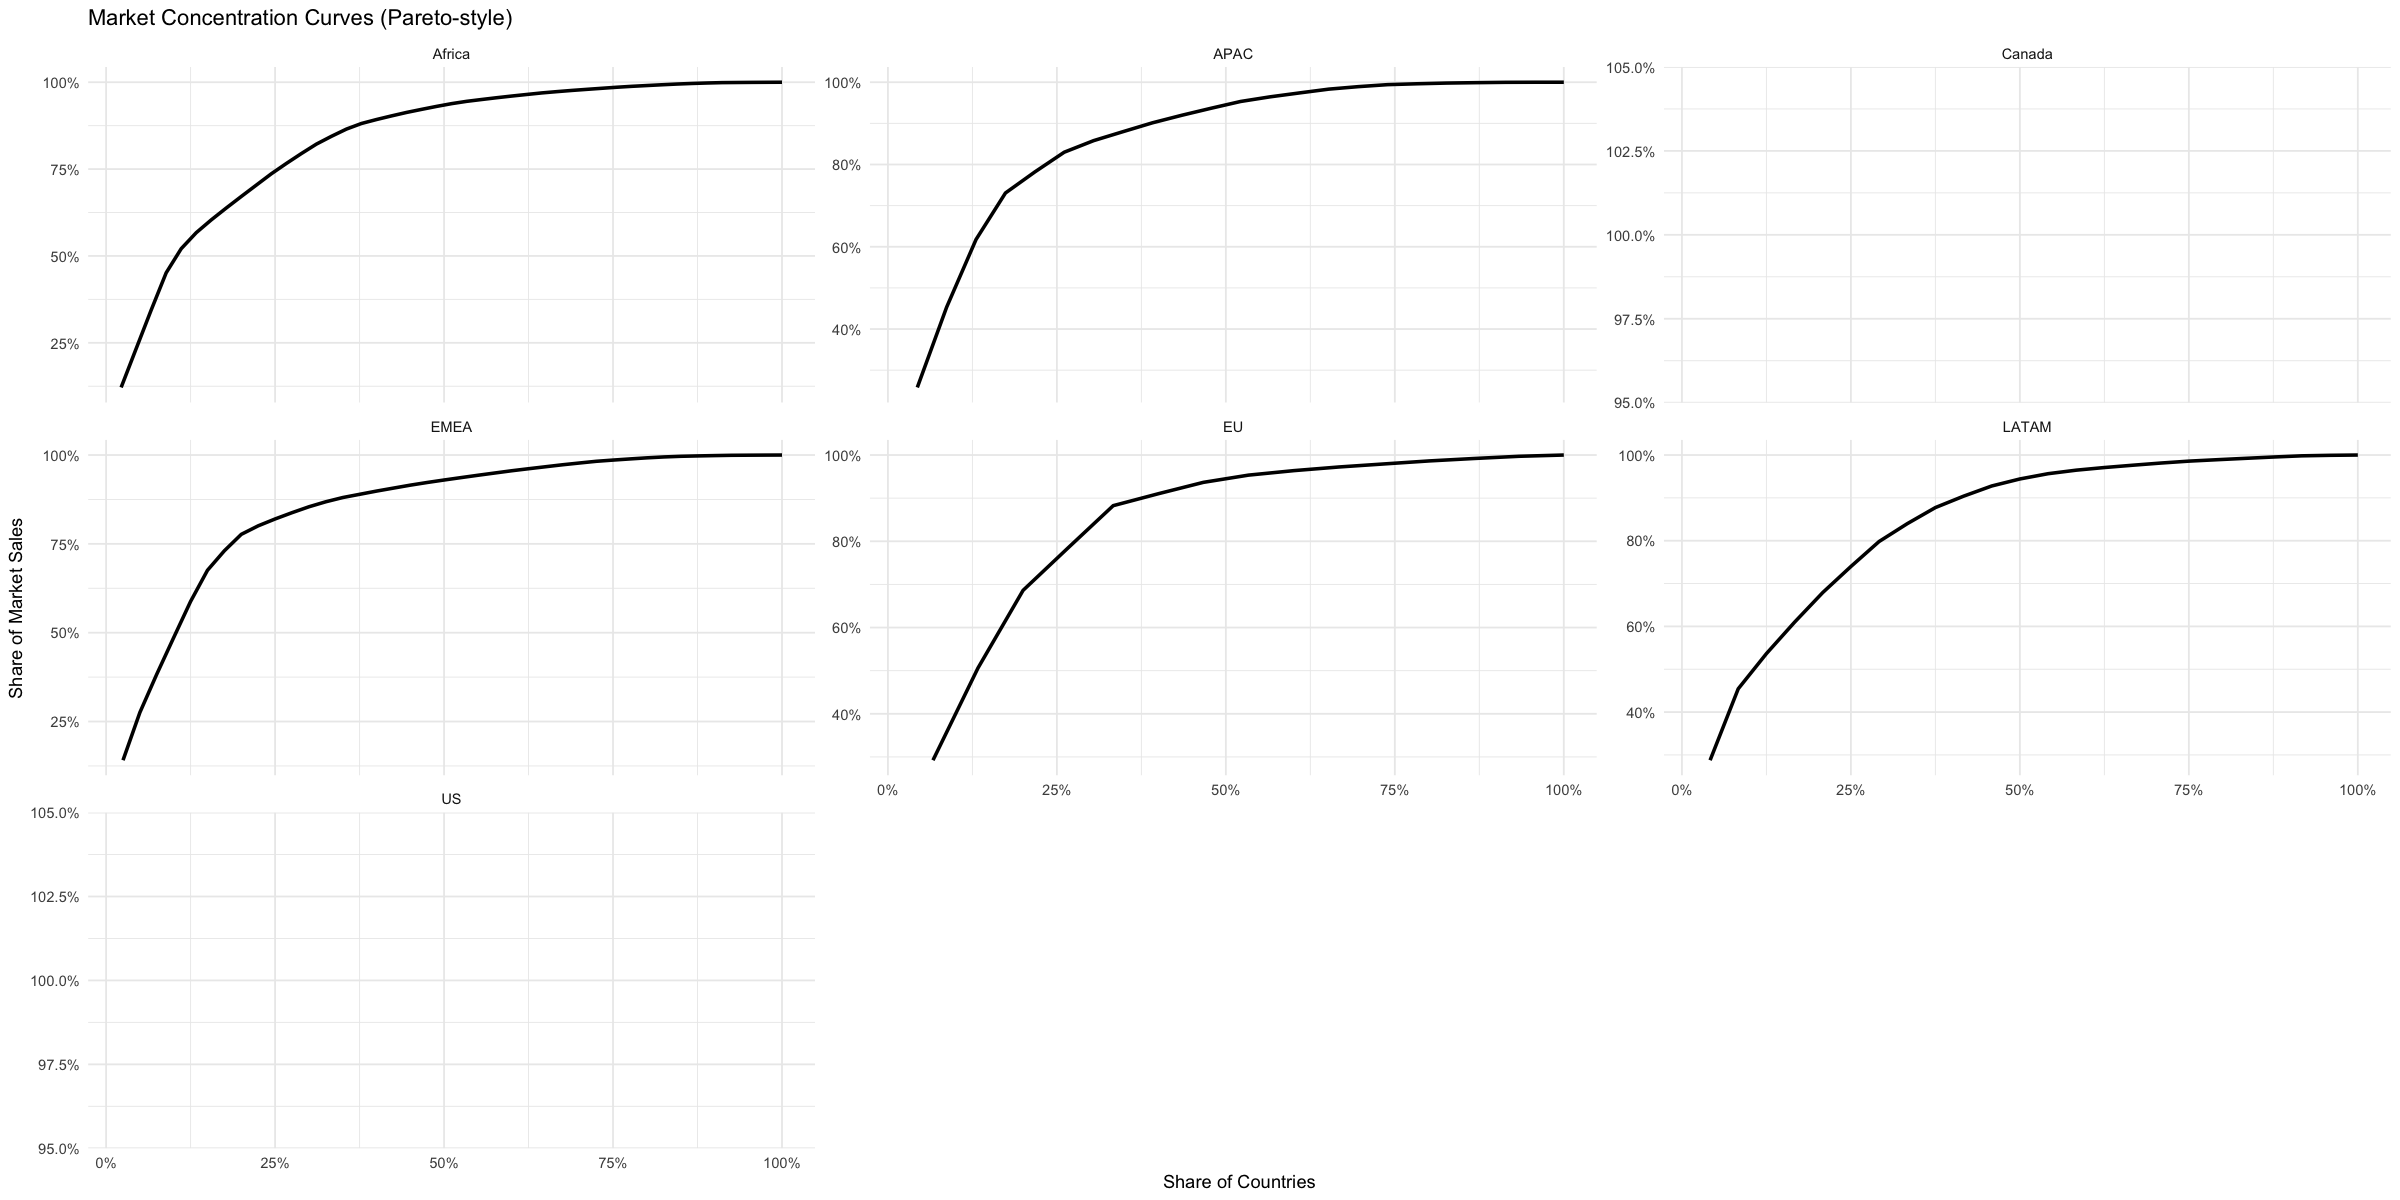

In [63]:
country_market_sales <- orders %>%
    group_by(market, country) %>%
    summarise(total_sales = sum(sales), .groups = "drop") %>%
    group_by(market) %>%
    arrange(market, desc(total_sales)) %>%
    mutate(
        country_rank = row_number(),
        country_share = country_rank / n(),
        sales_share   = cumsum(total_sales) / sum(total_sales)
    )

ggplot(country_market_sales,
        aes(x = country_share, y = sales_share)) +
    geom_line(size = 1) +
    facet_wrap(~ market, scales = "free_y") +
    scale_x_continuous(labels = scales::percent) +
    scale_y_continuous(labels = scales::percent) +
    labs(
        title = "Market Concentration Curves (Pareto-style)",
        x = "Share of Countries",
        y = "Share of Market Sales"
    ) +
    theme_minimal()